# 星巴克毕业项目

### 简介

这个数据集是一些模拟 Starbucks rewards 移动 app 上用户行为的数据。每隔几天，星巴克会向 app 的用户发送一些推送。这个推送可能仅仅是一条饮品的广告或者是折扣券或 BOGO（买一送一）。一些顾客可能一连几周都收不到任何推送。 

顾客收到的推送可能是不同的，这就是这个数据集的挑战所在。

你的任务是将交易数据、人口统计数据和推送数据结合起来判断哪一类人群会受到某种推送的影响。这个数据集是从星巴克 app 的真实数据简化而来。因为下面的这个模拟器仅产生了一种饮品， 实际上星巴克的饮品有几十种。

每种推送都有有效期。例如，买一送一（BOGO）优惠券推送的有效期可能只有 5 天。你会发现数据集中即使是一些消息型的推送都有有效期，哪怕这些推送仅仅是饮品的广告，例如，如果一条消息型推送的有效期是 7 天，你可以认为是该顾客在这 7 天都可能受到这条推送的影响。

数据集中还包含 app 上支付的交易信息，交易信息包括购买时间和购买支付的金额。交易信息还包括该顾客收到的推送种类和数量以及看了该推送的时间。顾客做出了购买行为也会产生一条记录。 

同样需要记住有可能顾客购买了商品，但没有收到或者没有看推送。

### 示例

举个例子，一个顾客在周一收到了满 10 美元减 2 美元的优惠券推送。这个推送的有效期从收到日算起一共 10 天。如果该顾客在有效日期内的消费累计达到了 10 美元，该顾客就满足了该推送的要求。

然而，这个数据集里有一些地方需要注意。即，这个推送是自动生效的；也就是说，顾客收到推送后，哪怕没有看到，满足了条件，推送的优惠依然能够生效。比如，一个顾客收到了"满10美元减2美元优惠券"的推送，但是该用户在 10 天有效期内从来没有打开看到过它。该顾客在 10 天内累计消费了 15 美元。数据集也会记录他满足了推送的要求，然而，这个顾客并没被受到这个推送的影响，因为他并不知道它的存在。

### 清洗

清洗数据非常重要也非常需要技巧。

你也要考虑到某类人群即使没有收到推送，也会购买的情况。从商业角度出发，如果顾客无论是否收到推送都打算花 10 美元，你并不希望给他发送满 10 美元减 2 美元的优惠券推送。所以你可能需要分析某类人群在没有任何推送的情况下会购买什么。

### 最后一项建议

因为这是一个毕业项目，你可以使用任何你认为合适的方法来分析数据。例如，你可以搭建一个机器学习模型来根据人口统计数据和推送的种类来预测某人会花费多少钱。或者，你也可以搭建一个模型来预测该顾客是否会对推送做出反应。或者，你也可以完全不用搭建机器学习模型。你可以开发一套启发式算法来决定你会给每个顾客发出什么样的消息（比如75% 的35 岁女性用户会对推送 A 做出反应，对推送 B 则只有 40% 会做出反应，那么应该向她们发送推送 A）。


# 数据集

一共有三个数据文件：

* portfolio.json – 包括推送的 id 和每个推送的元数据（持续时间、种类等等）
* profile.json – 每个顾客的人口统计数据
* transcript.json – 交易、收到的推送、查看的推送和完成的推送的记录

以下是文件中每个变量的类型和解释 ：

**portfolio.json**
* id (string) – 推送的id
* offer_type (string) – 推送的种类，例如 BOGO、打折（discount）、信息（informational）
* difficulty (int) – 满足推送的要求所需的最少花费
* reward (int) – 满足推送的要求后给与的优惠
* duration (int) – 推送持续的时间，单位是天
* channels (字符串列表)

**profile.json**
* age (int) – 顾客的年龄 
* became_member_on (int) – 该顾客第一次注册app的时间
* gender (str) – 顾客的性别（注意除了表示男性的 M 和表示女性的 F 之外，还有表示其他的 O）
* id (str) – 顾客id
* income (float) – 顾客的收入

**transcript.json**
* event (str) – 记录的描述（比如交易记录、推送已收到、推送已阅）
* person (str) – 顾客id
* time (int) – 单位是小时，测试开始时计时。该数据从时间点 t=0 开始
* value - (dict of strings) – 推送的id 或者交易的数额

**注意：**如果你正在使用 Workspace，在读取文件前，你需要打开终端/命令行，运行命令 `conda update pandas` 。因为 Workspace 中的 pandas 版本不能正确读入 transcript.json 文件的内容，所以需要更新到 pandas 的最新版本。你可以单击 notebook 左上角橘黄色的 jupyter 图标来打开终端/命令行。  

下面两张图展示了如何打开终端/命令行以及如何安装更新。首先打开终端/命令行：
<img src="pic1.png"/>

然后运行上面的命令：
<img src="pic2.png"/>

最后回到这个 notebook（还是点击橘黄色的 jupyter 图标），再次运行下面的单元格就不会报错了。

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from clean_data import clean_portfolio,clean_profile,draw_hist_pics
from clean_data import sep_df,clean_response,find_cid_groups, clean_cid_stats
from clean_data import add_feature_cols

import statsmodels.api as sm
%matplotlib inline
sns.set_style('whitegrid')

In [172]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [173]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## 问题
1. 影响活动响应情况的关键活动要素有哪些？ -- 目的：找到需要关注的主要活动特征，聚焦分析焦点
2. 哪些用户没有营销活动也会消费？  -- 目的：减少不必要的营销活动，降低营销成本
3. 对于每个的活动要素，主要的用户群体是？ -- 目的：发现不通过用户对不同活动的偏好，更有针对性的推送活动，进而提高活动响应率

## 方法
#### 1. 清洗数据，将用户的offer响应挂到每个交易上
- 折扣和bogo类offer，连接offer完成记录和交易记录，保留收到且看过的，满足最低消费金额，在发送时间有效期内，距离发送时间最近的一次交易
- informational类offer，连接交易记录，保留收到且看过的，在发送时间有效期内，距离发送时间最近的一次交易
- 结合三类offer接收和交易记录，如果一个交易有多类offer的，按回报最高的offer作为该交易使用的offer

#### 2. 以每类活动的特征为自变量，活动响应率为因变量，创建回归方程
- 变量通过相关系数初步筛选
- 得到解释力高，系数显著，且删除任一一条记录，系数仍稳定的回归关系
- 识别关键活动要素

#### 3. 通过构建活动要素偏好特征，查看匹配的用户群体
- offer交易次数占比，衡量用户总体的活动偏好水平
- offer交易金额占比，衡量用户总体的活动偏好水平
- bogo offer交易次数占总offer次数比例，衡量用户bogo类活动偏好水平
- discount offer交易次数占总offer次数比例，衡量用户discount类活动偏好水平
- informational offer交易次数占总offer次数比例，衡量用户informational活动偏好水平
- social offer交易次数占总offer次数比例，衡量用户social渠道偏好水平
- 对于非信息offer类，使用最高offer difficulty与最高offer交易金额的比例，衡量用户对最高difficulty的敏感度，当大于0时，该比例越高，说明对difficulty越敏感
- 用户群属性特征主要看年龄、收入水平、性别、注册会员时间

## 数据准备和初步探索

#### 1. 营销活动信息

In [174]:
portfolio = clean_portfolio(portfolio)
portfolio = portfolio.rename(columns={'index':'offeridx'})

In [175]:
portfolio1 = portfolio.join(pd.get_dummies(portfolio['offer_type']).drop('informational',axis=1))
portfolio1 

offeridx  reward  difficulty  duration_day     offer_type  \
0         0      10          10             7           bogo   
1         1      10          10             5           bogo   
2         2       0           0             4  informational   
3         3       5           5             7           bogo   
4         4       5          20            10       discount   
5         5       3           7             7       discount   
6         6       2          10            10       discount   
7         7       0           0             3  informational   
8         8       5           5             5           bogo   
9         9       2          10             7       discount   

                            offerid  duration_hour  email  mobile  web  \
0  ae264e3637204a6fb9bb56bc8210ddfd            168      1       1    0   
1  4d5c57ea9a6940dd891ad53e9dbe8da0            120      1       1    1   
2  3f207df678b143eea3cee63160fa8bed             96      1       1    1   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9            168      1       1    1   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7            240      1       0    1   
5  2298d6c36e964ae4a3e7e9706d1fb8c2            168      1       1    1   
6  fafdcd668e3743c1bb461111dcafc2a4            240      1       1    1   
7  5a8bc65990b245e5a138643cd4eb9837             72      1       1    0   
8  f19421c1d4aa40978ebb69ca19b0e20d            120      1       1    1   
9  2906b810c7d4411798c6938adc9daaa5            168      1       1    1   

   social  bogo  discount  
0       1     1         0  
1       1     1         0  
2       0     0         0  
3       0     1         0  
4       0     0         1  
5       1     0         1  
6       1     0         1  
7       1     0         0  
8       1     1         0  
9       0     0         1

- 有三种推送类型，10种条件组合（回报、难度、有效时长），4个买一送一活动，4个打折活动，2个营销信息
- 索引4门槛最高，只通过web和邮件发送； 0和1回报最高，0不通过web发送； 
- 三种推送类型中，bogo和discount有最低消费要求，交易记录中有offer完成状态；但informational没有最低消费要求，交易记录中没有完成状态

#### 2. 星巴克用户信息

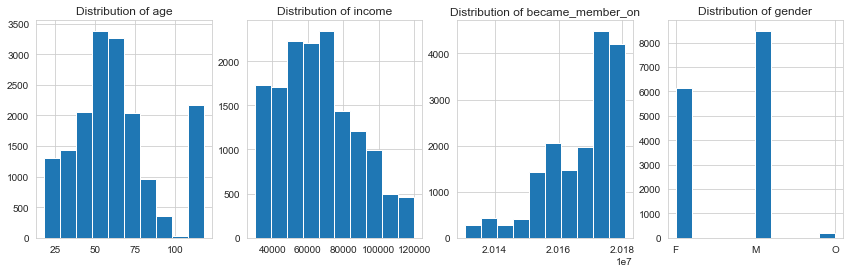

In [176]:
cols = ['age','income','became_member_on','gender']

# 基本的变量分布
plt.figure(figsize=(22,4))
for i,col in enumerate(profile[cols].columns):
    plt.subplot(161+i)
    profile[col].hist()
    plt.title('Distribution of '+ col)

plt.show()

In [177]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [178]:
profile.became_member_on.max(),profile.became_member_on.min()

(20180726, 20130729)

In [179]:
profile.query("age>=100").sample(10)

gender  age                                id  became_member_on  income
14718   None  118  b19541b74ab34a45a4d7743b8c68b36c          20171110     NaN
15420   None  118  bccb6c130c72428caf656e68cceccb1c          20170614     NaN
1889    None  118  9e1b77408fdb414bb6d36a1aa04567e8          20161030     NaN
14557   None  118  565c54e335184cb2a0cc563b6f9af82b          20160513     NaN
11070   None  118  37e765f48ac840a4b6de70c953d6576f          20180220     NaN
3261    None  118  438a2b144d774516a3ac79d50246d7d5          20170901     NaN
5327    None  118  30aad290db6a4c198edf5fd4c00c3553          20171021     NaN
3383    None  118  cfb8760657e4456da7a7627ce13db343          20180419     NaN
7327    None  118  b04ad520e0034a90b22692a292b2418c          20180421     NaN
11647   None  118  f9d169fa4c254d99b334c09088772cd0          20170324     NaN

In [180]:
# 清洗用户数据
profile1 = clean_profile(profile)
profile1.head()

gender  age                               cid  became_member_on  income  \
1       F   55  0610b486422d4921ae7d2bf64640c50b          20170715   112.0   
3       F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   100.0   
5       M   68  e2127556f4f64592b11af22de27a7932          20180426    70.0   
8       M   65  389bc3fa690240e798340f5a15918d5c          20180209    53.0   
12      M   58  2eeac8d8feae4a8cad5a6af0499a211d          20171111    51.0   

    became_member_month became_member_year age_range income_range  
1                     7       (2016, 2018]  (35, 55]    (90, 120]  
3                     5       (2016, 2018]  (55, 75]    (90, 120]  
5                     4       (2016, 2018]  (55, 75]     (60, 75]  
8                     2       (2016, 2018]  (55, 75]     (45, 60]  
12                   11       (2016, 2018]  (55, 75]     (45, 60]

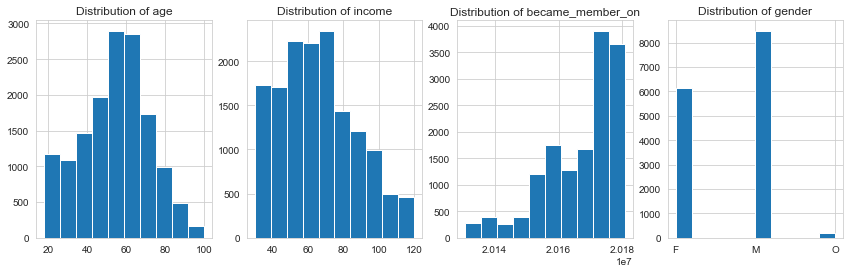

In [181]:
cols = ['age','income','became_member_on','gender']

# 基本的变量分布
plt.figure(figsize=(22,4))
for i,col in enumerate(profile1[cols].columns):
    plt.subplot(161+i)
    profile1[col].hist()
    plt.title('Distribution of '+ col)

plt.show()

In [182]:
profile1['gender'].value_counts()

M    8484
F    6124
O     212
Name: gender, dtype: int64

In [183]:
profile1['age_range'].value_counts()/profile.shape[0]

(55, 75]     0.334529
(35, 55]     0.300824
(17, 35]     0.139647
(75, 100]    0.096765
Name: age_range, dtype: float64

In [184]:
profile1['income_range'].value_counts()/profile.shape[0]

(60, 75]     0.222176
(45, 60]     0.213294
(29, 45]     0.180235
(90, 120]    0.129000
(75, 90]     0.127059
Name: income_range, dtype: float64

In [185]:
profile1['became_member_year'].value_counts()/profile.shape[0]

(2016, 2018]    0.544941
(2014, 2016]    0.271765
(2012, 2014]    0.055059
Name: became_member_year, dtype: float64

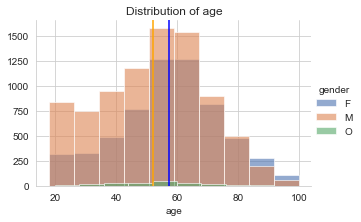

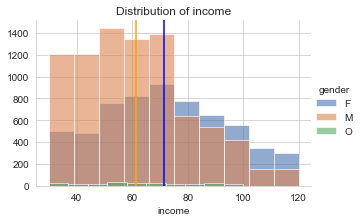

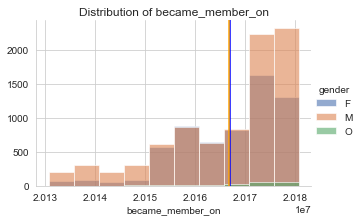

In [19]:
draw_hist_pics(profile1, cols, hue='gender')

- 原始用户表中有2000多个年龄异常，这部分用户没有收入和性别信息，剔除这部分后，剩余14820个用户id
- 其中，男性和女性分别占比41%和57%，其余性别为O
- 中老年年龄组(35到75岁)的人占比合计约73%, 超高龄(75, 100)占10%，年轻人(35以下)占14%
- 中等收入，即收入水平在45k-75k的人约占一半， 较低收入水平29k-45k约占20%，较高收入水平75k-120k约占30%
- 2015年-2018年的会员合计占比超过80%
- 男性用户年龄和收入水平比女性更低，特别的是男性会员在17年以后增加得比女性多

#### 3. 交易信息

In [186]:
transcript = transcript.rename(columns={'person':'cid', 'offer':'offerid'})

print(transcript.shape, transcript.event.unique())
transcript.sample(5)

(306534, 4) ['offer received' 'offer viewed' 'transaction' 'offer completed']


cid            event  \
29223   d0e5c238d4074233bdc3c872c646fc7b  offer completed   
70242   058e76ac9080489993e6adfbb943fd8d  offer completed   
229969  65fe3e1feeb1458abd54d955820572ec     offer viewed   
176379  431a9ec074b44e80886ba3dfed6dfe2f  offer completed   
84578   359b82a36b544b5cbbe1cb3054942385      transaction   

                                                    value  time  
29223   {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...    42  
70242   {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   174  
229969   {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}   528  
176379  {'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...   426  
84578                                    {'amount': 1.35}   210

In [187]:
# 清洗数据，拆分接收offer、浏览offer、完成offer、交易四个表
# 根据业务限制条件判断每个交易有对应到哪一个营销offer
received, viewed, completed, transaction = sep_df(transcript,  portfolio)
received_info = received.query("offer_type=='informational'")
received_other = received.query("offer_type !='informational'")

received_view, received_view_comp, transaction_response, response, received_response \
                                                = clean_response(received,viewed,completed,transaction\
                                                                ,received_info,received_other)

In [188]:
# offer接收+offer响应表，保留有用户信息的
received_response_cid = pd.merge(received_response, profile1, how='left', on='cid')
received_response_cid = received_response_cid[~received_response_cid.became_member_year.isnull()]

# 交易+offer响应表，保留有用户信息的
transaction_response_cid = pd.merge(transaction_response, profile1, how='left', on='cid')
transaction_response_cid = transaction_response_cid[~transaction_response_cid.became_member_year.isnull()]

In [189]:
received.shape

(74396, 13)

In [190]:
print(received_response_cid.shape)
received_response_cid.head()

(64997, 25)


cid  received_time  \
0  78afa995795e4d85b5d9ceeca43f5fef              0   
2  e2127556f4f64592b11af22de27a7932              0   
4  389bc3fa690240e798340f5a15918d5c              0   
6  2eeac8d8feae4a8cad5a6af0499a211d              0   
7  aa4862eba776480b8bb9c68455b8c2e1              0   

                     received_offer  offeridx  reward  difficulty  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9         3       5           5   
2  2906b810c7d4411798c6938adc9daaa5         9       2          10   
4  f19421c1d4aa40978ebb69ca19b0e20d         8       5           5   
6  3f207df678b143eea3cee63160fa8bed         2       0           0   
7  0b1e1539f2cc45b7b9fa7c272da2e1d7         4       5          20   

   duration_day     offer_type  duration_hour  email  mobile  web  social  \
0             7           bogo            168      1       1    1       0   
2             7       discount            168      1       1    1       0   
4             5           bogo            120      1       1    1       1   
6             4  informational             96      1       1    1       0   
7            10       discount            240      1       0    1       0   

   viewed_time  transaction_time  amount  is_response gender   age  \
0          6.0             132.0   19.89            1      F  75.0   
2          NaN               NaN     NaN            0      M  68.0   
4          0.0              60.0    9.54            1      M  65.0   
6          NaN               NaN     NaN            0      M  58.0   
7          NaN               NaN     NaN            0      F  61.0   

   became_member_on  income  became_member_month became_member_year age_range  \
0        20170509.0   100.0                  5.0       (2016, 2018]  (55, 75]   
2        20180426.0    70.0                  4.0       (2016, 2018]  (55, 75]   
4        20180209.0    53.0                  2.0       (2016, 2018]  (55, 75]   
6        20171111.0    51.0                 11.0       (2016, 2018]  (55, 75]   
7        20170911.0    57.0                  9.0       (2016, 2018]  (55, 75]   

  income_range  
0    (90, 120]  
2     (60, 75]  
4     (45, 60]  
6     (45, 60]  
7     (45, 60]

In [191]:
print(transaction_response.shape)
transaction_response.head()

(138933, 17)


cid  transaction_time  amount  received_time  \
0  02c083884c7d45b39cc68e1314fec56c                 0    0.83            NaN   
1  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f                 0   34.56            0.0   
2  54890f68699049c2a04d415abc25e717                 0   13.23            NaN   
3  b2f1cd155b864803ad8334cdf13c4bd2                 0   19.51            NaN   
4  fe97aa22dd3e48c8b143116a8403dd52                 0   18.97            NaN   

                     received_offer  reward  viewed_time  offeridx  \
0                               NaN     NaN          NaN       NaN   
1  2906b810c7d4411798c6938adc9daaa5     2.0          0.0       9.0   
2                               NaN     NaN          NaN       NaN   
3                               NaN     NaN          NaN       NaN   
4                               NaN     NaN          NaN       NaN   

   difficulty  duration_day offer_type  duration_hour  email  mobile  web  \
0         NaN           NaN        NaN            NaN    NaN     NaN  NaN   
1        10.0           7.0   discount          168.0    1.0     1.0  1.0   
2         NaN           NaN        NaN            NaN    NaN     NaN  NaN   
3         NaN           NaN        NaN            NaN    NaN     NaN  NaN   
4         NaN           NaN        NaN            NaN    NaN     NaN  NaN   

   social  is_offer  
0     NaN         0  
1     0.0         1  
2     NaN         0  
3     NaN         0  
4     NaN         0

In [192]:
# 总响应率: 响应次数/接收次数
received_response_cid.is_response.mean()

0.36860162776743544

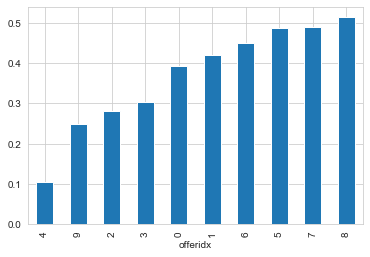

In [193]:
# 每类offer的响应率 图
received_response_cid.groupby('offeridx').is_response.mean().sort_values().plot(kind='bar');

In [194]:
# 每类offer的响应率、offer接收次数，offer接收人数，offer响应人数表
received_response_stats = received_response_cid.groupby('offeridx').agg({'is_response':['mean','count'],
                                               'cid':[pd.Series.nunique]})
received_response_stats = received_response_stats.join(received_response_cid.query("is_response==1")\
                                                       .groupby('offeridx').cid.nunique())

received_response_stats.columns = ['is_response_rate','offer_count', 'offer_unique_cid','response_unique_cid']
received_response_stats

is_response_rate  offer_count  offer_unique_cid  response_unique_cid
offeridx                                                                      
0                 0.393147         6537              5446                 2313
1                 0.419295         6468              5399                 2415
2                 0.282020         6496              5392                 1673
3                 0.303165         6541              5420                 1832
4                 0.104749         6549              5449                  654
5                 0.485745         6524              5399                 2806
6                 0.448807         6495              5408                 2591
7                 0.490250         6513              5407                 2872
8                 0.514014         6422              5315                 2958
9                 0.247520         6452              5334                 1466

- 总响应率在37%，最高的8类响应率51%
- 10种推送，分发量比较均匀,发送次数都在6500次左右，发送人数在5400左右


- 第4类推送响应率最低，响应人数明显最少，结合offer信息看，可能是因为门槛最高，也可能是因为没有在手机和社交渠道发送
- 2、3、9响应人数也少，可能也是因为没有在社交渠道发送

- 以上说明offer_type, difficulty,social是比较关键的活动特征

In [195]:
portfolio1

offeridx  reward  difficulty  duration_day     offer_type  \
0         0      10          10             7           bogo   
1         1      10          10             5           bogo   
2         2       0           0             4  informational   
3         3       5           5             7           bogo   
4         4       5          20            10       discount   
5         5       3           7             7       discount   
6         6       2          10            10       discount   
7         7       0           0             3  informational   
8         8       5           5             5           bogo   
9         9       2          10             7       discount   

                            offerid  duration_hour  email  mobile  web  \
0  ae264e3637204a6fb9bb56bc8210ddfd            168      1       1    0   
1  4d5c57ea9a6940dd891ad53e9dbe8da0            120      1       1    1   
2  3f207df678b143eea3cee63160fa8bed             96      1       1    1   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9            168      1       1    1   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7            240      1       0    1   
5  2298d6c36e964ae4a3e7e9706d1fb8c2            168      1       1    1   
6  fafdcd668e3743c1bb461111dcafc2a4            240      1       1    1   
7  5a8bc65990b245e5a138643cd4eb9837             72      1       1    0   
8  f19421c1d4aa40978ebb69ca19b0e20d            120      1       1    1   
9  2906b810c7d4411798c6938adc9daaa5            168      1       1    1   

   social  bogo  discount  
0       1     1         0  
1       1     1         0  
2       0     0         0  
3       0     1         0  
4       0     0         1  
5       1     0         1  
6       1     0         1  
7       1     0         0  
8       1     1         0  
9       0     0         1

In [196]:
# 以informational为基础，创建针对响应率的回归方程
# 多次调整特征，使去掉任何一个特征参数将不稳定，去掉任何一个记录方程参数仍较稳定。如下
i = 4

y = received_response_cid.groupby('offeridx').is_response.mean().reset_index()['is_response'].drop(i)*100
portfolio1['intercept'] = 1
portfolio1['diff_reward'] = portfolio1['difficulty']*portfolio1['reward']
X = portfolio1[['difficulty','social','bogo','discount','intercept']].drop(i)

In [197]:
# 查看自变量的相关性，保留最有用的变量
X.corr()[np.abs(X.corr())>=0.65] # 折扣和bogo方式存在负相关，但为了便于解释，均放入回归

difficulty  social  bogo  discount  intercept
difficulty         1.0     NaN   NaN       NaN        NaN
social             NaN     1.0   NaN       NaN        NaN
bogo               NaN     NaN   1.0       NaN        NaN
discount           NaN     NaN   NaN       1.0        NaN
intercept          NaN     NaN   NaN       NaN        NaN

In [198]:
rst = sm.OLS(y,X).fit()
rst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            is_response   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           0.000270
Time:                        23:26:02   Log-Likelihood:                -11.896
No. Observations:                   9   AIC:                             33.79
Df Residuals:                       4   BIC:                             34.78
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
difficulty    -1.8934      0.249     -7.597      0.002      -2.585      -1.201
social        19.9962      1.002     19.951      0.000      17.213      22.779
bogo          11.3284      2.183      5.190      0.007       5.269      17.388
discount      14.4967      2.541      5.705      0.005       7.442      21.552
intercept     28.6154      1.085     26.372      0.000      25.603      31.628
==============================================================================
Omnibus:                        1.593   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.078
Skew:                          -0.716   Prob(JB):                        0.583
Kurtosis:                       2.091   Cond. No.                         55.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

结论和解释：
- 系数全部显著，R2接近100%，比较具有解释力
- 信息类推送，预计综合响应率在28%左右，在其他条件不变的情况下，变成bogo或discount类型的推送，响应率预计会增加百分点10个左右
- 信息类推送是无门槛的，但bogo或discount类型都有门槛，其他条件不变的情况下，difficulty提高一个单位，预计响应率会比信息类低1-2个百分点
- 社交渠道非常重要，其他条件不变的情况下，推送增加社交渠道，预计响应率可以提升接近20个百分点

----
- 应该如何将社交渠道、推送类型和折扣门槛这些活动要素 与特定用户群体做匹配呢？下面结合用户特征做分析

#### 4. 用户交易行为信息

In [199]:
# 以用户为主键，清洗和整合用户收到offer的数据以及交易数据
cid_stats = clean_cid_stats(received_response_cid, transaction_response_cid)

In [200]:
cid_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cid                        14482 non-null  object 
 1   amount_tr_amin             14482 non-null  float64
 2   amount_tr_amax             14482 non-null  float64
 3   amount_tr_mean             14482 non-null  float64
 4   amount_tr_sum              14482 non-null  float64
 5   transaction_time_tr_count  14482 non-null  int64  
 6   is_offer_tr_sum            14482 non-null  int64  
 7   bogo_offer_sum             11057 non-null  float64
 8   discount_offer_sum         11057 non-null  float64
 9   informational_offer_sum    11057 non-null  float64
 10  social_offer_sum           11057 non-null  float64
 11  difficulty_offer_amin      11057 non-null  float64
 12  difficulty_offer_amax      11057 non-null  float64
 13  difficulty_offer_mean      11057 non-null  flo

In [233]:
cid_stats['amount_offer_sum']=cid_stats['amount_offer_sum'].fillna(0)
cid_stats['amount_offer_mean']=cid_stats['amount_offer_mean'].fillna(0)

In [234]:
# 查看数据分布，异常用户识别
cid_stats.describe()

amount_tr_amin  amount_tr_amax  amount_tr_mean  amount_tr_sum  \
count    14482.000000    14482.000000    14482.000000   14482.000000   
mean         8.148397       34.369278       15.251358     119.722014   
std          7.137558       86.300898       16.547832     130.248759   
min          0.050000        0.150000        0.150000       0.150000   
25%          1.040000        9.290000        3.890000      34.162500   
50%          7.210000       21.910000       14.305801      89.900000   
75%         13.450000       30.880000       21.467054     162.697500   
max         50.080000     1062.280000      451.470000    1608.690000   

       transaction_time_tr_count  is_offer_tr_sum  bogo_offer_sum  \
count               14482.000000     14482.000000    11057.000000   
mean                    8.554827         1.654330        0.955594   
std                     5.083278         1.344617        0.888970   
min                     1.000000         0.000000        0.000000   
25%                     5.000000         1.000000        0.000000   
50%                     7.500000         1.000000        1.000000   
75%                    11.000000         3.000000        1.000000   
max                    36.000000         6.000000        5.000000   

       discount_offer_sum  informational_offer_sum  social_offer_sum  \
count        11057.000000             11057.000000      11057.000000   
mean             0.756715                 0.454463          1.615266   
std              0.832670                 0.638782          1.015587   
min              0.000000                 0.000000          0.000000   
25%              0.000000                 0.000000          1.000000   
50%              1.000000                 0.000000          1.000000   
75%              1.000000                 1.000000          2.000000   
max              5.000000                 5.000000          6.000000   

       difficulty_offer_amin  difficulty_offer_amax  difficulty_offer_mean  \
count           11057.000000           11057.000000           11057.000000   
mean                4.461608               8.316994               6.448346   
std                 4.044054               4.464220               3.533177   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               5.000000               5.000000   
50%                 5.000000              10.000000               7.000000   
75%                 7.000000              10.000000               9.250000   
max                20.000000              20.000000              20.000000   

       amount_offer_amin  amount_offer_amax  amount_offer_mean  \
count       11057.000000       11057.000000       14482.000000   
mean           15.332082          25.970185          15.131499   
std            24.052424          57.911472          27.889308   
min             0.050000           0.050000           0.000000   
25%             8.780000          12.350000           1.116250   
50%            13.240000          20.010000          13.437500   
75%            18.900000          27.100000          20.860000   
max          1015.730000        1015.730000        1015.730000   

       amount_offer_sum  received_time_rece_count  bogo_rece_sum  \
count      14482.000000              14482.000000   14482.000000   
mean          34.114010                  4.488123       1.793122   
std           59.988863                  1.070554       1.116271   
min            0.000000                  1.000000       0.000000   
25%            1.132500                  4.000000       1.000000   
50%           22.430000                  5.000000       2.000000   
75%           48.907500                  5.000000       2.000000   
max         1073.510000                  6.000000       6.000000   

       discount_rece_sum  informational_rece_sum  social_rece_sum  \
count       14482.000000            14482.000000     14482.000000   
mean            1.796713              

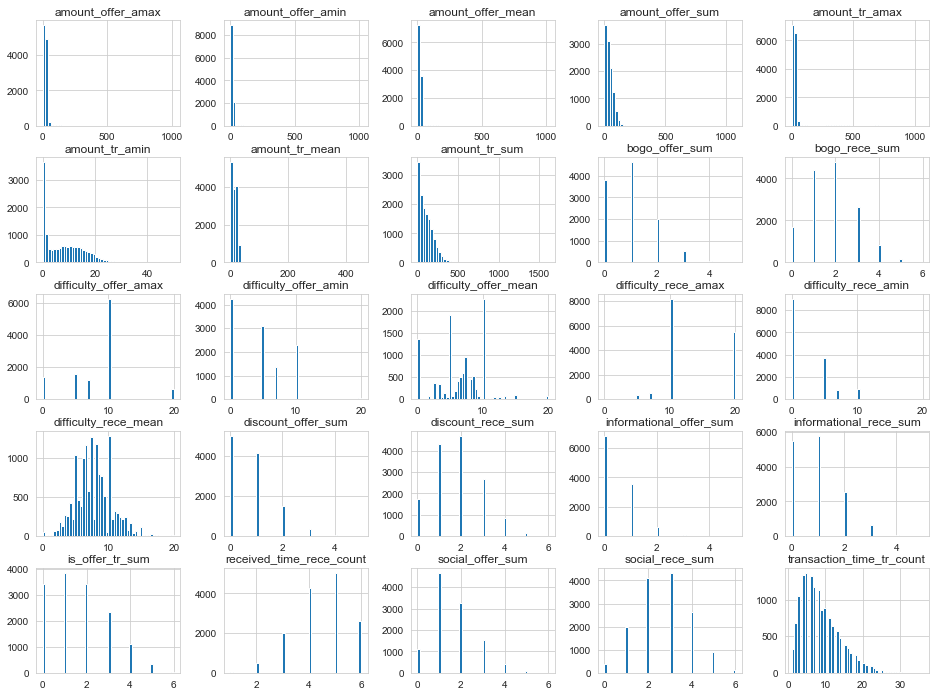

In [228]:
cid_stats.hist(figsize=(16,12),bins=50);

In [247]:
# 有人单均金额高于100了,而饮料的均价不应该这么贵，这看起来不像是个人用户
np.percentile(cid_stats.amount_tr_mean,97.5),\
np.percentile(cid_stats.amount_offer_mean,97.5),\
np.percentile(cid_stats.amount_tr_sum,97.5)

(33.58277764423078, 35.198750000000025, 398.5335000000003)

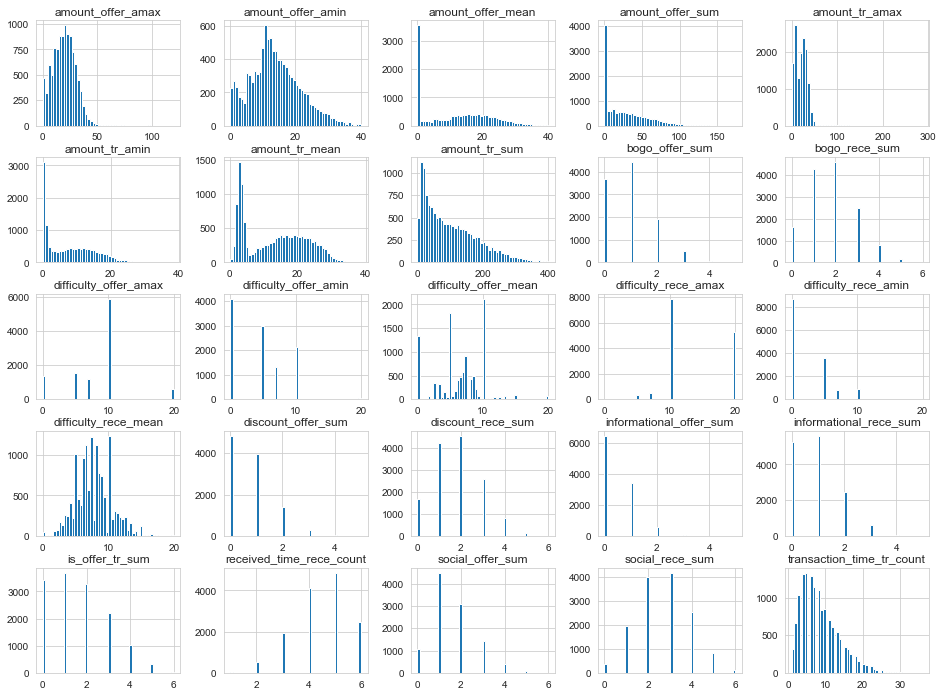

In [249]:
cid_stats.query('amount_tr_sum<400&amount_tr_mean<40&amount_offer_mean<40').hist(figsize=(16,12),bins=50);

In [250]:
cid_stats1 = cid_stats.query('amount_tr_sum<400&amount_tr_mean<40&amount_offer_mean<40')

In [251]:
cid_stats1.describe()

amount_tr_amin  amount_tr_amax  amount_tr_mean  amount_tr_sum  \
count    13965.000000    13965.000000    13965.000000   13965.000000   
mean         8.083165       21.354050       13.482733     103.940286   
std          7.108074       15.683548        8.895834      82.710235   
min          0.050000        0.150000        0.150000       0.150000   
25%          1.010000        8.990000        3.776250      32.890000   
50%          7.130000       21.220000       13.929091      85.380000   
75%         13.400000       29.830000       20.905000     155.990000   
max         38.580000      287.780000       38.580000     399.710000   

       transaction_time_tr_count  is_offer_tr_sum  bogo_offer_sum  \
count               13965.000000     13965.000000    10557.000000   
mean                    8.452990         1.629860        0.948944   
std                     5.027997         1.339946        0.886805   
min                     1.000000         0.000000        0.000000   
25%                     5.000000         1.000000        0.000000   
50%                     7.000000         1.000000        1.000000   
75%                    11.000000         3.000000        1.000000   
max                    36.000000         6.000000        5.000000   

       discount_offer_sum  informational_offer_sum  social_offer_sum  \
count        10557.000000             10557.000000      10557.000000   
mean             0.748413                 0.458653          1.605570   
std              0.827471                 0.639072          1.008095   
min              0.000000                 0.000000          0.000000   
25%              0.000000                 0.000000          1.000000   
50%              1.000000                 0.000000          1.000000   
75%              1.000000                 1.000000          2.000000   
max              5.000000                 5.000000          6.000000   

       difficulty_offer_amin  difficulty_offer_amax  difficulty_offer_mean  \
count           10557.000000           10557.000000           10557.000000   
mean                4.412144               8.254807               6.391900   
std                 4.022009               4.486924               3.539642   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               5.000000               5.000000   
50%                 5.000000              10.000000               6.750000   
75%                 7.000000              10.000000               9.000000   
max                20.000000              20.000000              20.000000   

       amount_offer_amin  amount_offer_amax  amount_offer_mean  \
count       10557.000000       10557.000000       13965.000000   
mean           13.845455          19.512976          12.532944   
std             7.580674          10.243704          10.070770   
min             0.050000           0.050000           0.000000   
25%             8.640000          12.020000           0.570000   
50%            13.080000          19.590000          12.995000   
75%            18.590000          26.400000          20.330000   
max            39.990000         120.290000          39.990000   

       amount_offer_sum  received_time_rece_count  bogo_rece_sum  \
count      13965.000000              13965.000000   13965.000000   
mean          28.683984                  4.482564       1.789474   
std           29.420374                  1.070188       1.115984   
min            0.000000                  1.000000       0.000000   
25%            0.570000                  4.000000       1.000000   
50%           21.180000                  5.000000       2.000000   
75%           46.850000                  5.000000       2.000000   
max          174.130000                  6.000000       6.000000   

       discount_rece_sum  informational_rece_sum  social_rece_sum  \
count       13965.000000            13965.000000     13965.000000   
mean            1.791335              

In [253]:
cid_stats1[['cid','is_offer_tr_sum','received_time_rece_count','social_offer_sum']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13965 entries, 0 to 14481
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cid                       13965 non-null  object 
 1   is_offer_tr_sum           13965 non-null  int64  
 2   received_time_rece_count  13965 non-null  int64  
 3   social_offer_sum          10557 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 545.5+ KB


- 可以看出，有3400+个用户有交易记录，收到过推送但一次也没有响应过，这类人群需要减少发推送的频次，减少干扰 
- 其余发生过活动交易的用户，可查看偏好各类活动要素的用户群体特征

#### 分类整理需要探索的数据

In [307]:
final_cid_stats = pd.merge(cid_stats1,profile1,how='left', on='cid')

In [308]:
final_cid_stats.describe()

amount_tr_amin  amount_tr_amax  amount_tr_mean  amount_tr_sum  \
count    13965.000000    13965.000000    13965.000000   13965.000000   
mean         8.083165       21.354050       13.482733     103.940286   
std          7.108074       15.683548        8.895834      82.710235   
min          0.050000        0.150000        0.150000       0.150000   
25%          1.010000        8.990000        3.776250      32.890000   
50%          7.130000       21.220000       13.929091      85.380000   
75%         13.400000       29.830000       20.905000     155.990000   
max         38.580000      287.780000       38.580000     399.710000   

       transaction_time_tr_count  is_offer_tr_sum  bogo_offer_sum  \
count               13965.000000     13965.000000    10557.000000   
mean                    8.452990         1.629860        0.948944   
std                     5.027997         1.339946        0.886805   
min                     1.000000         0.000000        0.000000   
25%                     5.000000         1.000000        0.000000   
50%                     7.000000         1.000000        1.000000   
75%                    11.000000         3.000000        1.000000   
max                    36.000000         6.000000        5.000000   

       discount_offer_sum  informational_offer_sum  social_offer_sum  \
count        10557.000000             10557.000000      10557.000000   
mean             0.748413                 0.458653          1.605570   
std              0.827471                 0.639072          1.008095   
min              0.000000                 0.000000          0.000000   
25%              0.000000                 0.000000          1.000000   
50%              1.000000                 0.000000          1.000000   
75%              1.000000                 1.000000          2.000000   
max              5.000000                 5.000000          6.000000   

       difficulty_offer_amin  difficulty_offer_amax  difficulty_offer_mean  \
count           10557.000000           10557.000000           10557.000000   
mean                4.412144               8.254807               6.391900   
std                 4.022009               4.486924               3.539642   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               5.000000               5.000000   
50%                 5.000000              10.000000               6.750000   
75%                 7.000000              10.000000               9.000000   
max                20.000000              20.000000              20.000000   

       amount_offer_amin  amount_offer_amax  amount_offer_mean  \
count       10557.000000       10557.000000       13965.000000   
mean           13.845455          19.512976          12.532944   
std             7.580674          10.243704          10.070770   
min             0.050000           0.050000           0.000000   
25%             8.640000          12.020000           0.570000   
50%            13.080000          19.590000          12.995000   
75%            18.590000          26.400000          20.330000   
max            39.990000         120.290000          39.990000   

       amount_offer_sum  received_time_rece_count  bogo_rece_sum  \
count      13965.000000              13965.000000   13965.000000   
mean          28.683984                  4.482564       1.789474   
std           29.420374                  1.070188       1.115984   
min            0.000000                  1.000000       0.000000   
25%            0.570000                  4.000000       1.000000   
50%           21.180000                  5.000000       2.000000   
75%           46.850000                  5.000000       2.000000   
max          174.130000                  6.000000       6.000000   

       discount_rece_sum  informational_rece_sum  social_rece_sum  \
count       13965.000000            13965.000000     13965.000000   
mean            1.791335              

In [318]:
clust_features1 = ['cid','amount_tr_sum','amount_tr_amin','amount_tr_amax','amount_tr_mean',\
                   'transaction_time_tr_count','amount_offer_sum','amount_offer_mean','amount_offer_amax',\
                  'is_offer_tr_sum','gender','age','income','became_member_year']

In [319]:
clust_cid_df = final_cid_stats[clust_features1]

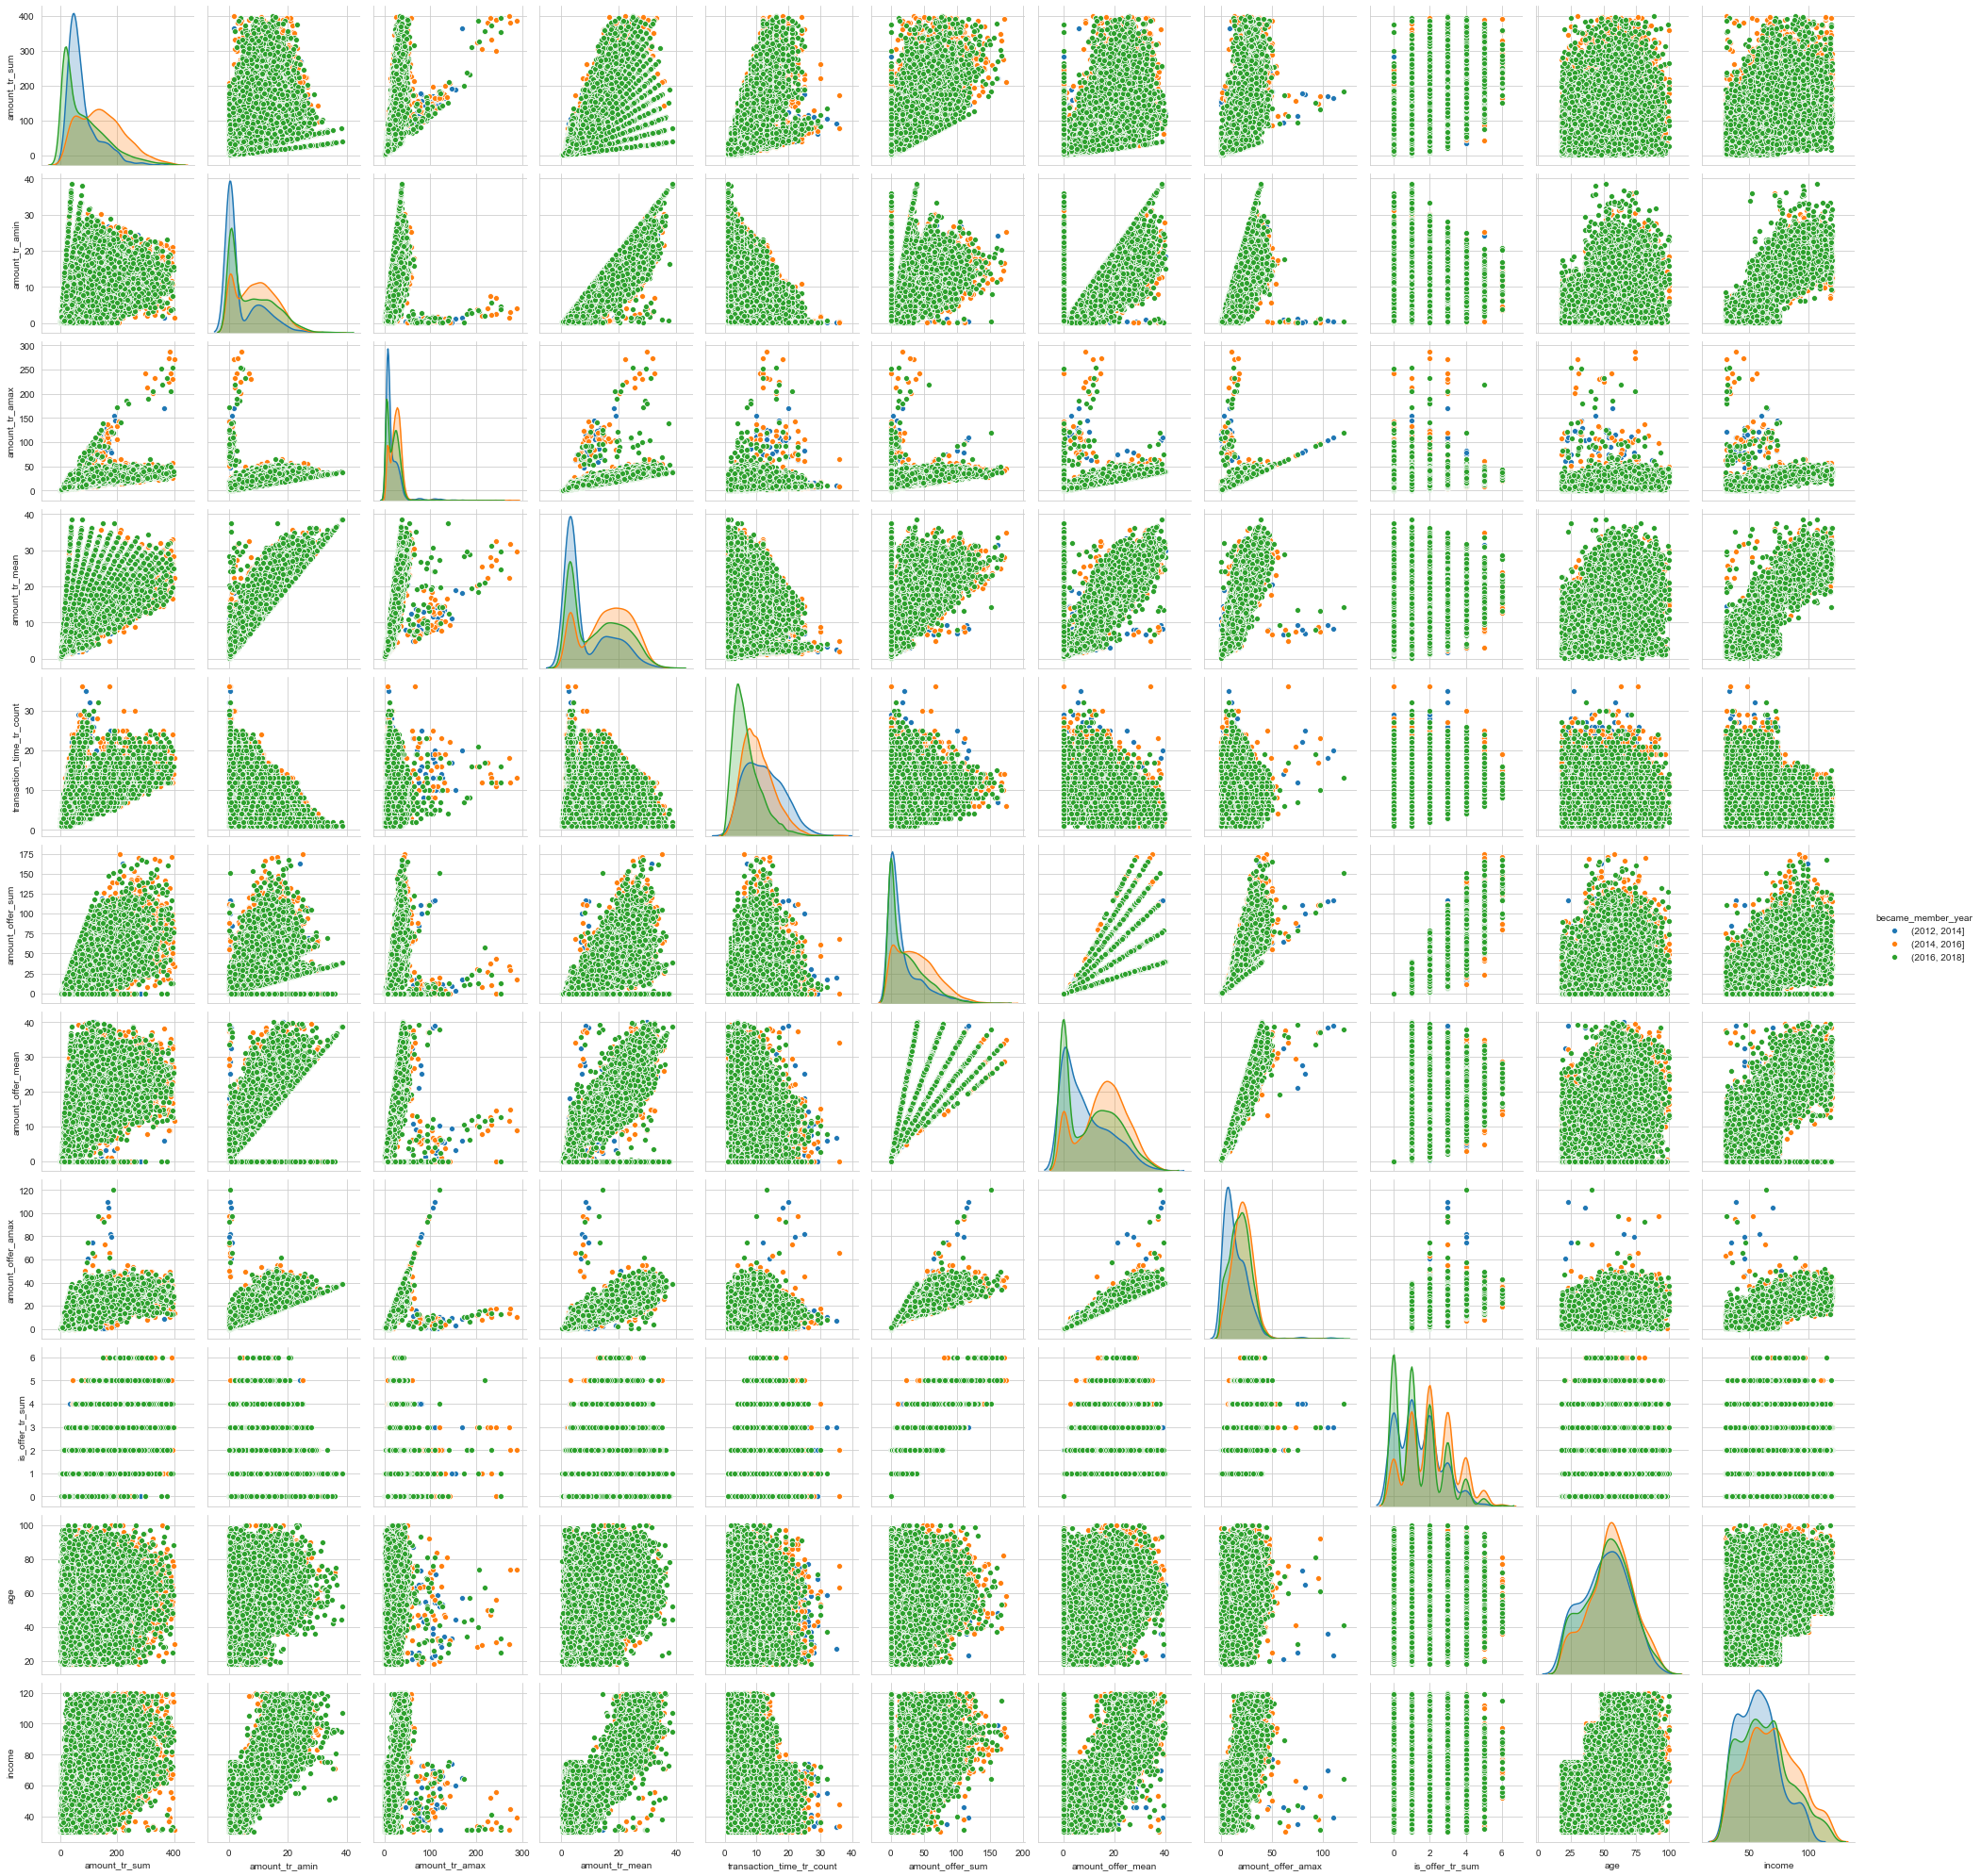

In [320]:
sns.pairplot(clust_cid_df, hue='became_member_year')

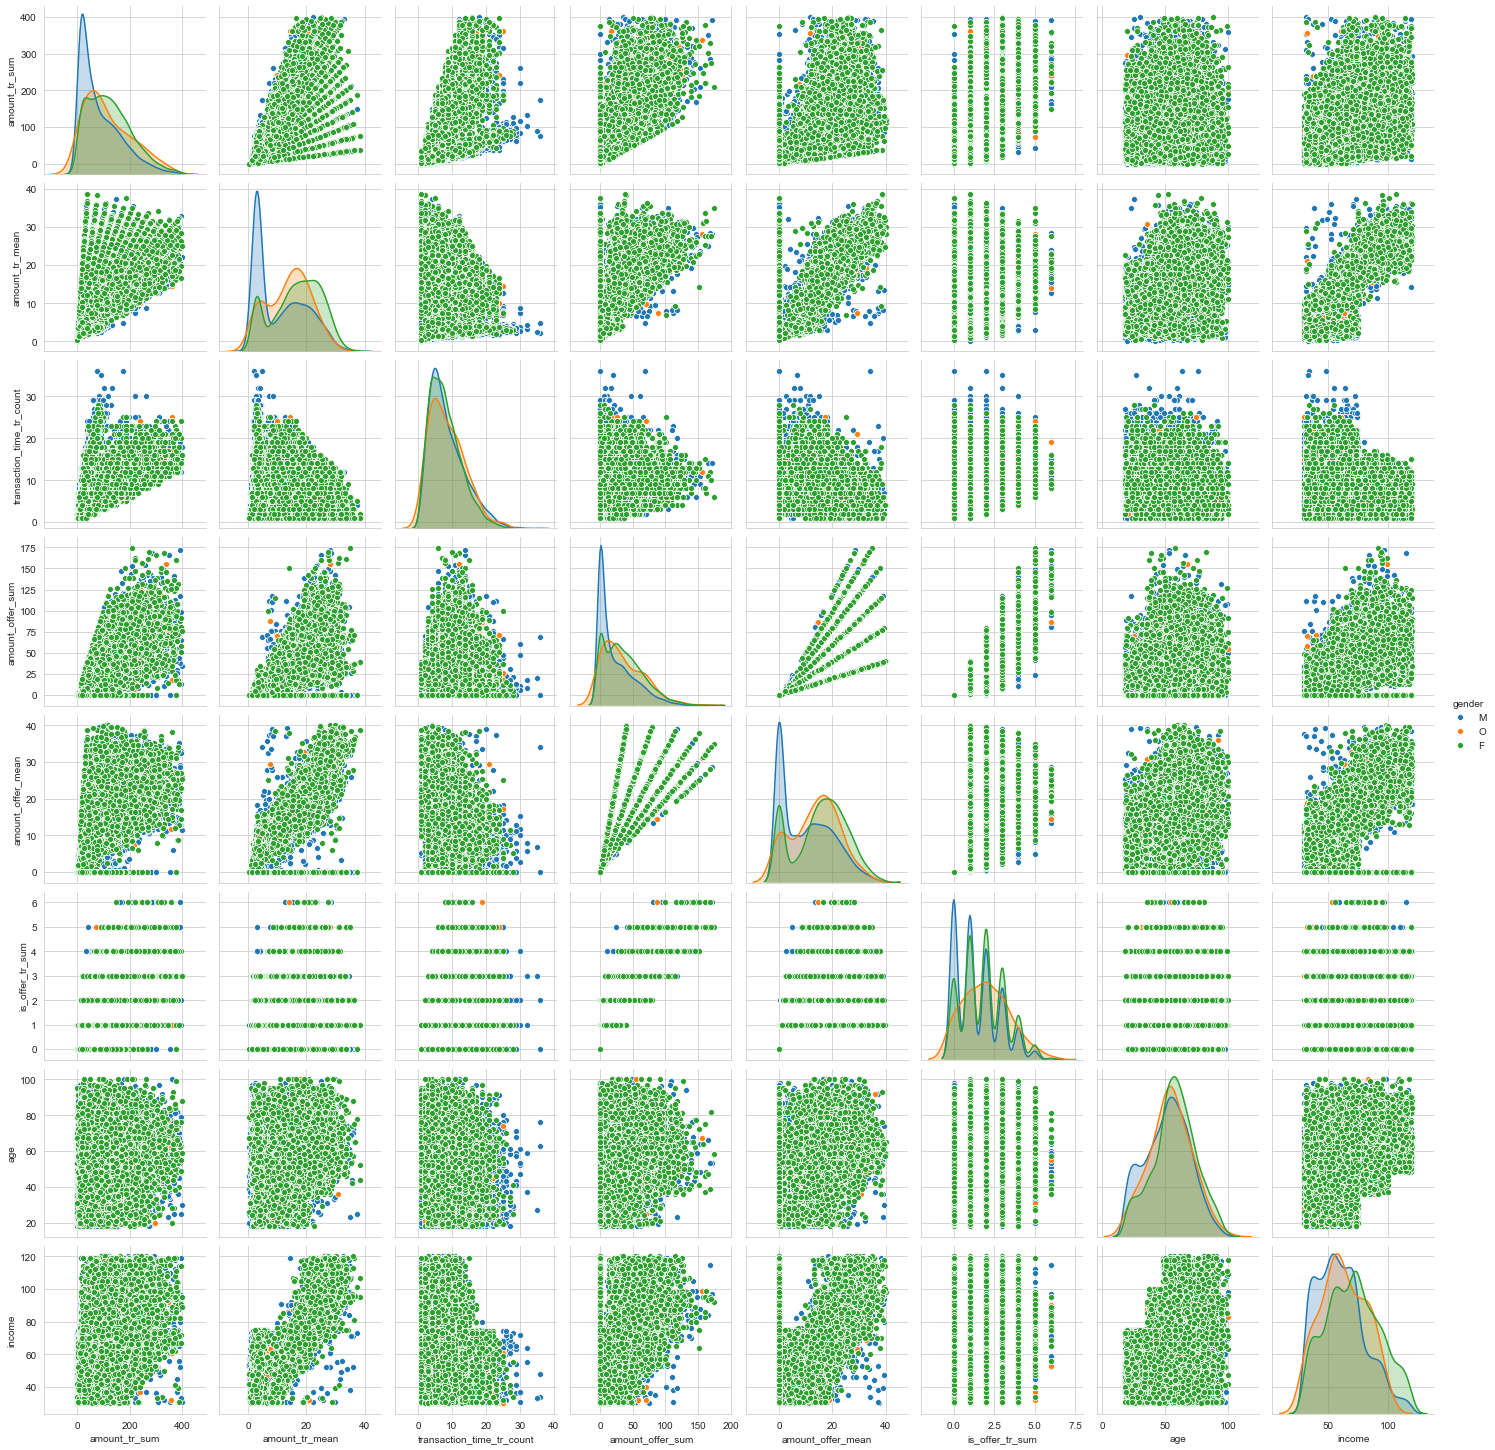

In [279]:
sns.pairplot(clust_cid_df, hue='gender')

In [322]:
clust_cid_df['is_male'] = (clust_cid_df['gender']=='M').astype(int) 
clust_cid_df['offer_amount_rate'] = clust_cid_df['amount_offer_sum']/clust_cid_df['amount_tr_sum']
clust_cid_df['offer_count_rate'] = clust_cid_df['is_offer_tr_sum']/clust_cid_df['transaction_time_tr_count']

In [323]:
became_member_year = pd.get_dummies(clust_cid_df['became_member_year'])
became_member_year.columns = ['oldest_member','older_member','new_member']
clust_cid_df = clust_cid_df.join(became_member_year) 

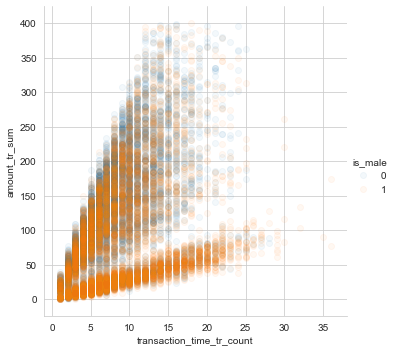

In [324]:
fg = sns.FacetGrid(data=clust_cid_df[['transaction_time_tr_count','amount_tr_sum','is_male','new_member']],\
                   hue='is_male',size = 5,aspect = 1)
fg.map(plt.scatter, 'transaction_time_tr_count', 'amount_tr_sum', alpha=0.05).add_legend()
plt.show()

In [388]:
cluster_features2 = ['cid','transaction_time_tr_count','amount_tr_amax',\
                  'is_offer_tr_sum','age','income','is_male','new_member']
clust_cid_df_feature = clust_cid_df[cluster_features2]
clust_cid_df_feature

cid  transaction_time_tr_count  \
0      0009655768c64bdeb2e877511632db8f                          8   
1      0011e0d4e6b944f998e987f904e8c1e5                          5   
2      0020c2b971eb4e9188eac86d93036a77                          8   
3      0020ccbbb6d84e358d3414a3ff76cffd                         12   
4      003d66b6608740288d6cc97a6903f4f0                         18   
...                                 ...                        ...   
13960  fff29fb549084123bd046dbc5ceb4faa                         11   
13961  fff7576017104bcc8677a8d63322b5e1                          6   
13962  fff8957ea8b240a6b5e634b6ee8eafcf                          5   
13963  fffad4f4828548d1b5583907f2e9906b                         12   
13964  ffff82501cea40309d5fdd7edcca4a07                         15   

       amount_tr_amax  is_offer_tr_sum  age  income  is_male  new_member  
0               28.16                2   33    72.0        1           1  
1               23.03                2   40    57.0        0           1  
2               33.86                2   59    90.0        0           0  
3               20.08                4   24    60.0        0           0  
4                7.41                2   26    73.0        0           1  
...               ...              ...  ...     ...      ...         ...  
13960           39.59                4   59    93.0        0           1  
13961            8.01                0   71    73.0        1           1  
13962            6.39                0   71    56.0        1           1  
13963           12.18                3   34    34.0        1           1  
13964           23.32                4   45    62.0        0           0  

[13965 rows x 8 columns]

In [389]:
clust_cid_df_feature.corr()[np.abs(clust_cid_df_feature.corr())>0.4]

transaction_time_tr_count  amount_tr_amax  \
transaction_time_tr_count                        1.0             NaN   
amount_tr_amax                                   NaN        1.000000   
is_offer_tr_sum                                  NaN             NaN   
age                                              NaN             NaN   
income                                           NaN        0.488452   
is_male                                          NaN             NaN   
new_member                                       NaN             NaN   

                           is_offer_tr_sum  age    income  is_male  new_member  
transaction_time_tr_count              NaN  NaN       NaN      NaN         NaN  
amount_tr_amax                         NaN  NaN  0.488452      NaN         NaN  
is_offer_tr_sum                        1.0  NaN       NaN      NaN         NaN  
age                                    NaN  1.0       NaN      NaN         NaN  
income                                 NaN  NaN  1.000000      NaN         NaN  
is_male                                NaN  NaN       NaN      1.0         NaN  
new_member                             NaN  NaN       NaN      NaN         1.0

In [390]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [412]:
for col in ['is_male','new_member','transaction_time_tr_count','amount_tr_amax','is_offer_tr_sum','age','income']:
    scaler = StandardScaler()
    clust_cid_df_feature[col+'_scale'] =  scaler.fit_transform(clust_cid_df_feature[[col]].values)

In [413]:
clust_cid_df_feature

cid  transaction_time_tr_count  \
0      0009655768c64bdeb2e877511632db8f                          8   
1      0011e0d4e6b944f998e987f904e8c1e5                          5   
2      0020c2b971eb4e9188eac86d93036a77                          8   
3      0020ccbbb6d84e358d3414a3ff76cffd                         12   
4      003d66b6608740288d6cc97a6903f4f0                         18   
...                                 ...                        ...   
13960  fff29fb549084123bd046dbc5ceb4faa                         11   
13961  fff7576017104bcc8677a8d63322b5e1                          6   
13962  fff8957ea8b240a6b5e634b6ee8eafcf                          5   
13963  fffad4f4828548d1b5583907f2e9906b                         12   
13964  ffff82501cea40309d5fdd7edcca4a07                         15   

       amount_tr_amax  is_offer_tr_sum  age  income  is_male  new_member  \
0               28.16                2   33    72.0        1           1   
1               23.03                2   40    57.0        0           1   
2               33.86                2   59    90.0        0           0   
3               20.08                4   24    60.0        0           0   
4                7.41                2   26    73.0        0           1   
...               ...              ...  ...     ...      ...         ...   
13960           39.59                4   59    93.0        0           1   
13961            8.01                0   71    73.0        1           1   
13962            6.39                0   71    56.0        1           1   
13963           12.18                3   34    34.0        1           1   
13964           23.32                4   45    62.0        0           0   

       transaction_time_tr_count_scale  amount_tr_amax_scale  \
0                            -0.090097              0.433970   
1                            -0.686777              0.106864   
2                            -0.090097              0.797421   
3                             0.705477             -0.081238   
4                             1.898838             -0.889120   
...                                ...                   ...   
13960                         0.506584              1.162786   
13961                        -0.487884             -0.850862   
13962                        -0.686777             -0.954158   
13963                         0.705477             -0.584968   
13964                         1.302158              0.125356   

       is_offer_tr_sum_scale  age_scale  income_scale  is_male_scale  \
0                   0.276245  -1.221626      0.323167       0.862233   
1                   0.276245  -0.819607     -0.374005      -1.159779   
2                   0.276245   0.271586      1.159773      -1.159779   
3                   1.768895  -1.738507     -0.234571      -1.159779   
4                   0.276245  -1.623644      0.369645      -1.159779   
...                      ...        ...           ...            ...   
13960               1.768895   0.271586      1.299207      -1.159779   
13961              -1.216406   0.960761      0.369645       0.862233   
13962              -1.216406   0.960761     -0.420483       0.862233   
13963               1.022570  -1.164194     -1.443001       0.862233   
13964               1.768895  -0.532451     -0.141614      -1.159779   

       new_member_scale  
0              0.782679  
1              0.782679  
2             -1.277663  
3             -1.277663  
4              0.782679  
...                 ...  
13960          0.782679  
13961          0.782679  
13962          0.782679  
13963          0.782679  
13964         -1.277663  

[13965 rows x 15 columns]

In [436]:
clust_cid_df_final = clust_cid_df_feature.iloc[:,8:]
clust_cid_df_final

transaction_time_tr_count_scale  amount_tr_amax_scale  \
0                            -0.090097              0.433970   
1                            -0.686777              0.106864   
2                            -0.090097              0.797421   
3                             0.705477             -0.081238   
4                             1.898838             -0.889120   
...                                ...                   ...   
13960                         0.506584              1.162786   
13961                        -0.487884             -0.850862   
13962                        -0.686777             -0.954158   
13963                         0.705477             -0.584968   
13964                         1.302158              0.125356   

       is_offer_tr_sum_scale  age_scale  income_scale  is_male_scale  \
0                   0.276245  -1.221626      0.323167       0.862233   
1                   0.276245  -0.819607     -0.374005      -1.159779   
2                   0.276245   0.271586      1.159773      -1.159779   
3                   1.768895  -1.738507     -0.234571      -1.159779   
4                   0.276245  -1.623644      0.369645      -1.159779   
...                      ...        ...           ...            ...   
13960               1.768895   0.271586      1.299207      -1.159779   
13961              -1.216406   0.960761      0.369645       0.862233   
13962              -1.216406   0.960761     -0.420483       0.862233   
13963               1.022570  -1.164194     -1.443001       0.862233   
13964               1.768895  -0.532451     -0.141614      -1.159779   

       new_member_scale  
0              0.782679  
1              0.782679  
2             -1.277663  
3             -1.277663  
4              0.782679  
...                 ...  
13960          0.782679  
13961          0.782679  
13962          0.782679  
13963          0.782679  
13964         -1.277663  

[13965 rows x 7 columns]

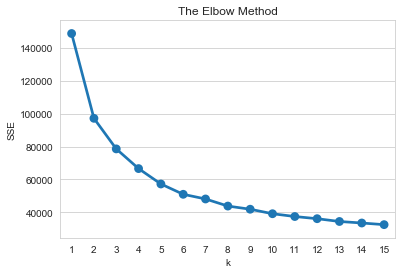

In [424]:
sse = {}
for k in range(1,16):
    
    model_kmeans = KMeans(n_clusters=k, random_state=0)
    model_kmeans.fit(clust_cid_df_final)
    #cluster_labels = model_kmeans.labels_
    #clust_cid_df_final = clust_cid_df_final.assign(Cluster= cluster_labels)
    sse[k] = model_kmeans.inertia_
    
plt.title('The Elbow Method') 
plt.xlabel('k'); 
plt.ylabel('SSE') 
sns.pointplot(x=list(sse.keys()), y=list(sse.values())) 
plt.show()

- 聚合成5类之后，每类点到簇中心的距离之和sse减少趋于缓慢，所以决定5个聚类中心

In [431]:
model_kmeans = KMeans(n_clusters=5, random_state=0)
model_kmeans.fit(clust_cid_df_final)
cluster_labels = model_kmeans.labels_
clust_cid_df_final = clust_cid_df_final.assign(Cluster= cluster_labels)

In [432]:
clust_cid_df_melt = pd.melt(clust_cid_df_final, id_vars=['Cluster'],\
                            value_vars = clust_cid_df_final.iloc[:,:-1].columns,\
                           var_name='Feature',value_name='Value')

In [433]:
clust_cid_df_melt

Cluster                          Feature     Value
0            3  transaction_time_tr_count_scale -0.090097
1            3  transaction_time_tr_count_scale -0.686777
2            4  transaction_time_tr_count_scale -0.090097
3            3  transaction_time_tr_count_scale  0.705477
4            3  transaction_time_tr_count_scale  1.898838
...        ...                              ...       ...
97750        2                 new_member_scale  0.782679
97751        1                 new_member_scale  0.782679
97752        1                 new_member_scale  0.782679
97753        3                 new_member_scale  0.782679
97754        4                 new_member_scale -1.277663

[97755 rows x 3 columns]

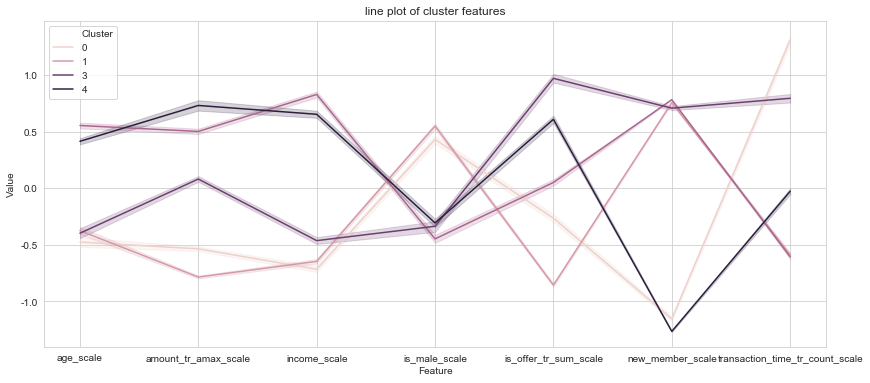

In [434]:
# 每类用户的特征图
plt.figure(figsize=(14,6))
plt.title("line plot of cluster features")
sns.lineplot(x='Feature', y='Value',hue='Cluster', data=clust_cid_df_melt)

In [444]:
clust_cid_df_results = clust_cid_df_feature.iloc[:,:8].assign(Cluster= cluster_labels)
clust_cid_df_results.head()

cid  transaction_time_tr_count  \
0  0009655768c64bdeb2e877511632db8f                          8   
1  0011e0d4e6b944f998e987f904e8c1e5                          5   
2  0020c2b971eb4e9188eac86d93036a77                          8   
3  0020ccbbb6d84e358d3414a3ff76cffd                         12   
4  003d66b6608740288d6cc97a6903f4f0                         18   

   amount_tr_amax  is_offer_tr_sum  age  income  is_male  new_member  Cluster  
0           28.16                2   33    72.0        1           1        3  
1           23.03                2   40    57.0        0           1        3  
2           33.86                2   59    90.0        0           0        4  
3           20.08                4   24    60.0        0           0        3  
4            7.41                2   26    73.0        0           1        3

In [451]:
# offer交易次数占比
clust_cid_df_results['offer_tr_rate'] = clust_cid_df_results.is_offer_tr_sum/  clust_cid_df_results.transaction_time_tr_count

In [461]:
#每类用户各指标水平
clust_cid_df_results.groupby('Cluster').agg({
    'age':['count','mean','max'],
    'income':['mean','median','max'],
    'is_male':'mean',
    'new_member':'mean',
    'is_offer_tr_sum':'mean',
    'transaction_time_tr_count':'mean',
    'offer_tr_rate':'mean',
    'amount_tr_amax':'mean'
})

age                     income                 is_male new_member  \
        count       mean  max       mean median    max      mean       mean   
Cluster                                                                       
0        2183  45.996793   98  49.660101   49.0   75.0  0.786990   0.060467   
1        3701  47.748717   98  51.156985   50.0   99.0  0.845447   0.987301   
2        3217  63.926329  100  82.877836   82.0  120.0  0.352502   1.000000   
3        1698  47.362780  100  55.100707   55.0  100.0  0.407538   0.963486   
4        3166  61.495262  100  79.109602   78.0  120.0  0.422299   0.006633   

        is_offer_tr_sum transaction_time_tr_count offer_tr_rate amount_tr_amax  
                   mean                      mean          mean           mean  
Cluster                                                                         
0              1.276225                 15.031608      0.091091      12.966628  
1              0.483923                  5.497163      0.103051       9.056112  
2              1.698477                  5.411564      0.355776      29.228020  
3              2.931095                 12.449352      0.261532      22.634034  
4              2.445673                  8.319330      0.319564      32.826077

- 年龄的区分度类似于收入的区分度
- 0类用户，主要是老会员、男性、低收入段用户；本身交易频次高，单均价相对偏低，用户offer交易比例低 --低价值高频老用户，不太需要发送刺激消费类offer，可以注重挖掘其老带新的价值
- 1类用户，主要是新会员、男性、低收入段用户；本身交易频次低，单均价最低，用户offer交易比例也低 --低价值低频新用户，可能不是很好的目标用户
- 2类用户，主要是新会员，女性、高收入段用户；本身交易频次低，但单均价和offer交易比例都很高 --高价值低频新用户，需要offer维护
- 3类用户，主要是新会员、女性、中等收入段用户；本身交易频次高、单均价偏高、offer比例也偏高 --中等价值的高频新用户，需要offer维护
- 4类用户，主要是老会员、女性、高收入段用户；本身交易频次中等，单均价最高、offer比例也高 --高价值的中频老用户，需要offer维护

In [40]:
# 1.不需要offer仍交易的用户
cid_noneed_offer = cid_stats[cid_stats.is_offer_tr_sum==0].iloc[:,:7]
cid_noneed_offer = pd.merge(cid_noneed_offer,profile1,how='left', on='cid')

In [41]:
# 2.收到offer，且有过offer交易的用户
cid_with_offer = cid_stats[cid_stats.is_offer_tr_sum>0]
# 增加offer交易相关的特征变量
cid_with_offer = add_feature_cols(cid_with_offer)

cid_with_offer = pd.merge(cid_with_offer,profile1,how='left', on='cid')

In [42]:
cols1 = ['amount_tr_mean','transaction_time_tr_count','age','income','became_member_on','gender']

metrics = ['offer_count_ratio','offer_amount_ratio','bogo_offer_ratio','discount_offer_ratio'\
          ,'informational_offer_ratio','social_offer_ratio','difficulty_offer_ratio']

all_feature_cols = cols1+metrics+['became_member_year','age_range','income_range']
cid_with_offer_feature = cid_with_offer[all_feature_cols]

In [43]:
cid_with_offer_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10920 entries, 0 to 10919
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   amount_tr_mean             10920 non-null  float64 
 1   transaction_time_tr_count  10920 non-null  int64   
 2   age                        10920 non-null  int64   
 3   income                     10920 non-null  float64 
 4   became_member_on           10920 non-null  int64   
 5   gender                     10920 non-null  object  
 6   offer_count_ratio          10920 non-null  float64 
 7   offer_amount_ratio         10920 non-null  float64 
 8   bogo_offer_ratio           10920 non-null  float64 
 9   discount_offer_ratio       10920 non-null  float64 
 10  informational_offer_ratio  10920 non-null  float64 
 11  social_offer_ratio         10920 non-null  float64 
 12  difficulty_offer_ratio     10920 non-null  float64 
 13  became_member_year         1092

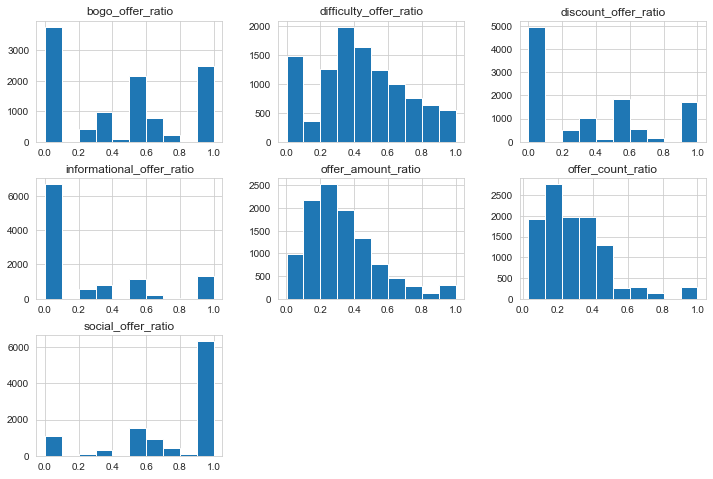

In [44]:
# 查看
cid_with_offer_feature[metrics].hist(figsize=(12,8));

- 可以看到有些用户只参加过某一类活动，后续可以分别对比只偏好某一类活动的用户特征
- 设置了活动门槛的offer，如果设置的门槛金额超过交易金额的60%，接受的人就不多了；而门槛太低(低于20%)可能收获也不大，人们的参与兴趣也不大

In [45]:
cid_with_offer_feature.describe()

amount_tr_mean  transaction_time_tr_count           age        income  \
count    10920.000000               10920.000000  10920.000000  10920.000000   
mean        16.203882                   9.165568     55.430769     67.831319   
std          9.470430                   4.988885     17.049901     21.636468   
min          0.150000                   1.000000     18.000000     30.000000   
25%          9.272360                   5.000000     44.000000     52.000000   
50%         16.518611                   8.000000     56.000000     66.000000   
75%         22.439062                  12.000000     67.000000     83.000000   
max         77.288750                  36.000000    100.000000    120.000000   

       became_member_on  offer_count_ratio  offer_amount_ratio  \
count      1.092000e+04       10920.000000        10920.000000   
mean       2.016557e+07           0.298594            0.332623   
std        1.156909e+04           0.194456            0.208921   
min        2.013073e+07           0.031250            0.000525   
25%        2.016041e+07           0.166667            0.182777   
50%        2.017041e+07           0.250000            0.288881   
75%        2.017112e+07           0.400000            0.433464   
max        2.018073e+07           1.000000            1.000000   

       bogo_offer_ratio  discount_offer_ratio  informational_offer_ratio  \
count      10920.000000          10920.000000               10920.000000   
mean           0.433573              0.335897                   0.230530   
std            0.384499              0.366980                   0.344688   
min            0.000000              0.000000                   0.000000   
25%            0.000000              0.000000                   0.000000   
50%            0.500000              0.250000                   0.000000   
75%            0.750000              0.500000                   0.400000   
max            1.000000              1.000000                   1.000000   

       social_offer_ratio  difficulty_offer_ratio  
count        10920.000000            10920.000000  
mean             0.760351                0.437891  
std              0.331217                0.262387  
min              0.000000                0.000000  
25%              0.500000                0.279433  
50%              1.000000                0.420345  
75%              1.000000                0.619579  
max              1.000000                1.000000

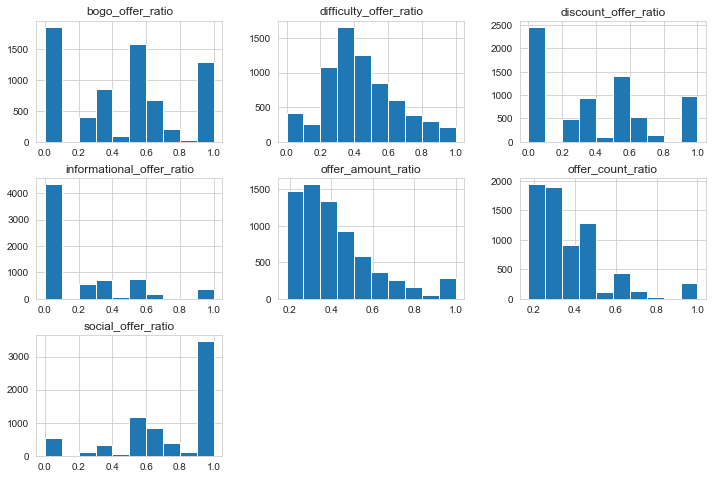

In [46]:
# 3. 定义整体有活动偏好的用户: offer_count_ratio、offer_amount_ratio两个指标均高于25%分位数
cid_offer_like = cid_with_offer_feature.query("offer_count_ratio>=0.17 & offer_amount_ratio>=0.185")
#cid_offer_like = cid_with_offer_feature.query("offer_count_ratio>=0.25 & offer_amount_ratio>=0.28")
# 查看
cid_offer_like[metrics].hist(figsize=(12,8));

In [47]:
cid_offer_like.shape

(7031, 16)

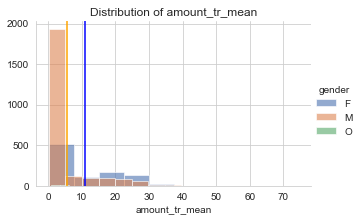

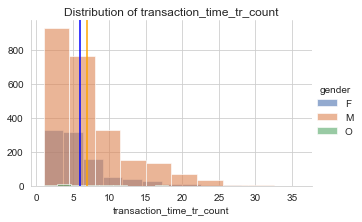

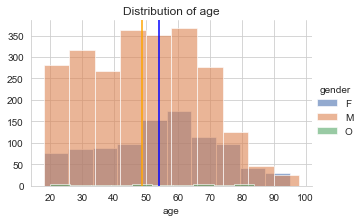

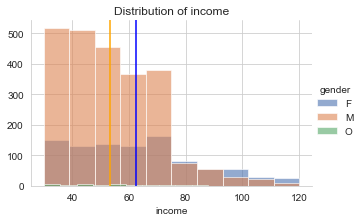

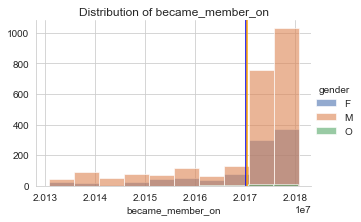

In [48]:
# 无需活动仍交易的用户：次均交易金额、交易次数、年龄、收入、注册时间、性别特征
draw_hist_pics(cid_noneed_offer, cols1, hue='gender')

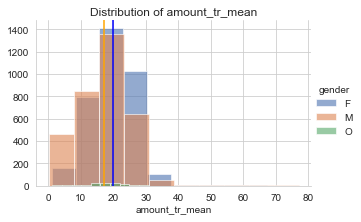

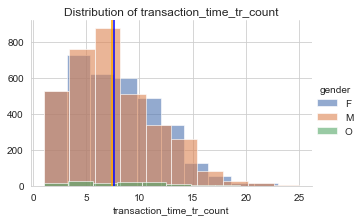

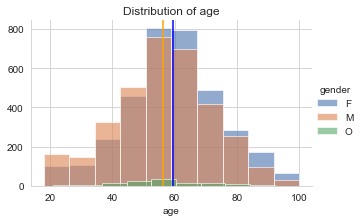

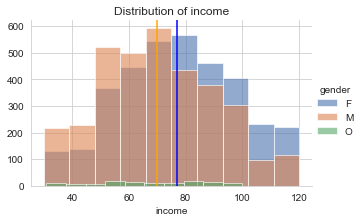

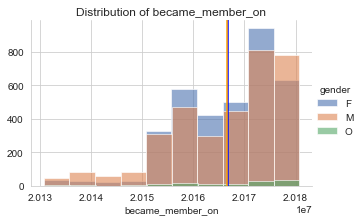

In [49]:
# 有活动偏好的用户：次均交易金额、交易次数、年龄、收入、注册时间、性别特征
draw_hist_pics(cid_offer_like, cols1, hue='gender')

结论：
无需活动仍交易的用户：
- 以男性为主，次均交易金额大部分低于5
- 相比有活动偏好的用户，无活动交易的用户男性中20-40岁中低年龄段的更多，女性中年龄分布较均衡
- 收入水平绝大部分低于75k，低于50k的也较多
- 注册会员时间大部分在17年以后

有活动偏好的用户：
- 男女都有，次均交易金额在20左右，比上述用户高出许多
- 男女整体年龄段无太大差异，主要都在40-80岁内，分布在60岁左右
- 收入水平低于50k的较少，集中在50-100k
- 注册会员时间除了17年以后的，也包括15年和16年的

#### 查看偏好每个活动要素的具体用户群体特征

In [50]:
feature_groups = ['gender','age_range','income_range','became_member_year']

In [51]:
# 偏好bogo的用户群体特征
bogo_like, bogo_like_cid_groups = find_cid_groups(cid_offer_like, feature_groups, \
                                                  metric='bogo_offer_ratio', condition='==1')
bogo_like_cid_groups

gender
F    670
M    598
O     23
Name: count, dtype: int64 
 age_range
(17, 35]      96
(35, 55]     445
(55, 75]     566
(75, 100]    184
Name: count, dtype: int64 
 income_range
(29, 45]     127
(45, 60]     245
(60, 75]     282
(75, 90]     285
(90, 120]    352
Name: count, dtype: int64 
 became_member_year
(2012, 2014]     38
(2014, 2016]    372
(2016, 2018]    881
Name: count, dtype: int64 



gender age_range income_range became_member_year  count  tr_amount_mean  \
0      F  (55, 75]    (90, 120]       (2016, 2018]     88       26.115112   
1      F  (55, 75]     (75, 90]       (2016, 2018]     58       21.905502   
2      M  (55, 75]     (60, 75]       (2016, 2018]     42       18.162035   
3      F  (55, 75]    (90, 120]       (2014, 2016]     40       26.175245   
4      M  (35, 55]     (60, 75]       (2016, 2018]     40       15.112272   
5      M  (35, 55]     (45, 60]       (2016, 2018]     36       12.623204   
6      M  (55, 75]     (45, 60]       (2016, 2018]     36       11.888552   
7      F  (35, 55]    (90, 120]       (2016, 2018]     36       26.701288   
8      M  (55, 75]    (90, 120]       (2016, 2018]     36       26.158806   
9      F  (55, 75]     (60, 75]       (2016, 2018]     35       17.769646   

   tr_count_mean  
0       4.272727  
1       4.189655  
2       4.404762  
3       5.375000  
4       5.225000  
5       5.250000  
6       4.972222  
7       4.083333  
8       4.083333  
9       4.028571

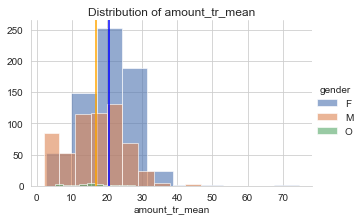

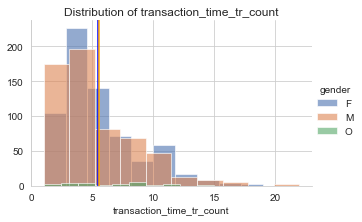

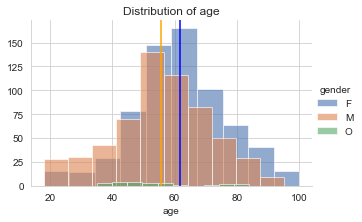

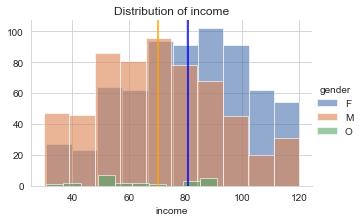

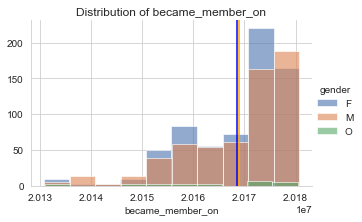

In [52]:
draw_hist_pics(cid_offer_like.query("bogo_offer_ratio==1"), cols1, hue='gender')

结论：
- 男女都有，15-18年的会员都有，但女性的年龄和收入水平有差异
- 偏好bogo类活动的女性平均年龄比男性高5-10岁
- 男女收入分布较分散，从最高到最低都有，但女性收入主女性平均收入水平在80k以上，而男性用户平均在70k左右

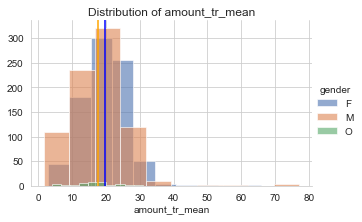

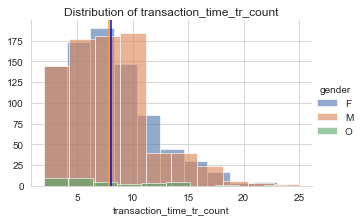

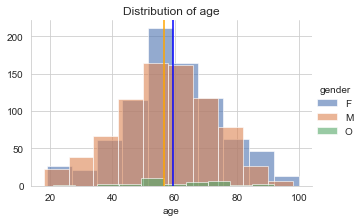

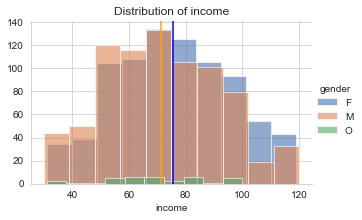

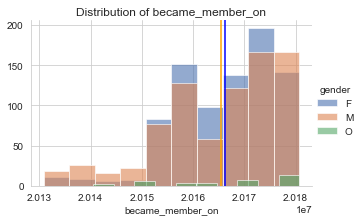

In [53]:
draw_hist_pics(cid_offer_like.query("bogo_offer_ratio<=0.60 & bogo_offer_ratio>=0.4"), cols1, hue='gender')

In [54]:
# 偏好discount的用户群体特征
discount_like, discount_like_cid_groups = find_cid_groups(cid_offer_like, feature_groups, \
                                                  metric='discount_offer_ratio', condition='==1')

discount_like_cid_groups

gender
F    514
M    445
O     15
Name: count, dtype: int64 
 age_range
(17, 35]      36
(35, 55]     329
(55, 75]     497
(75, 100]    112
Name: count, dtype: int64 
 income_range
(29, 45]      44
(45, 60]     153
(60, 75]     234
(75, 90]     281
(90, 120]    262
Name: count, dtype: int64 
 became_member_year
(2012, 2014]     34
(2014, 2016]    259
(2016, 2018]    681
Name: count, dtype: int64 



gender age_range income_range became_member_year  count  tr_amount_mean  \
0      F  (55, 75]     (75, 90]       (2016, 2018]     71       22.166649   
1      F  (55, 75]    (90, 120]       (2016, 2018]     64       27.149171   
2      M  (35, 55]     (75, 90]       (2016, 2018]     41       22.574895   
3      M  (55, 75]    (90, 120]       (2016, 2018]     40       25.823885   
4      F  (55, 75]    (90, 120]       (2014, 2016]     36       25.825632   
5      F  (35, 55]     (75, 90]       (2016, 2018]     36       21.885606   
6      M  (55, 75]     (60, 75]       (2016, 2018]     34       17.028689   
7      M  (55, 75]     (75, 90]       (2016, 2018]     33       21.526382   
8      M  (35, 55]     (60, 75]       (2016, 2018]     31       16.392711   
9      F  (35, 55]     (60, 75]       (2016, 2018]     30       16.397125   

   tr_count_mean  
0       4.056338  
1       3.609375  
2       3.731707  
3       4.050000  
4       6.111111  
5       4.055556  
6       4.794118  
7       3.666667  
8       4.612903  
9       4.600000

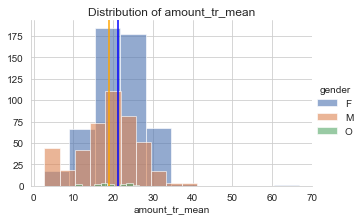

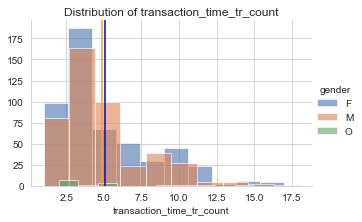

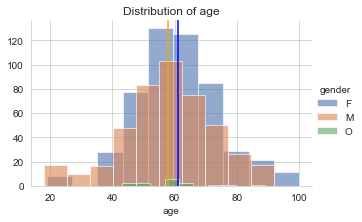

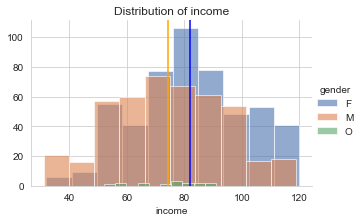

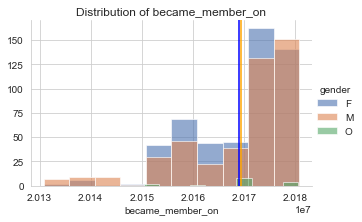

In [55]:
draw_hist_pics(cid_offer_like.query("discount_offer_ratio==1"), cols1, hue='gender')

- 和bogo类似，男女都有，15-18年的会员都有；
- 折扣类用户，男女的年龄分布差别不大，绝大部分都在35-75之间
- 对比bogo类，折扣类用户收入分布更为集中，男性集中在50k-100k，女性集中在50k-120k

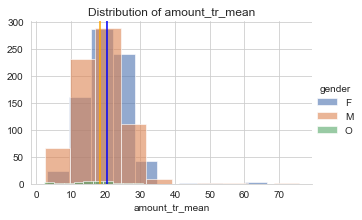

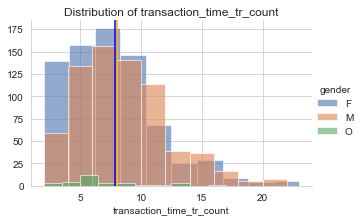

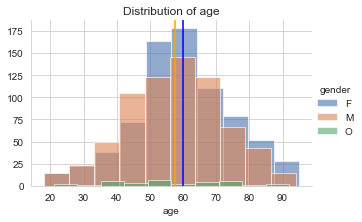

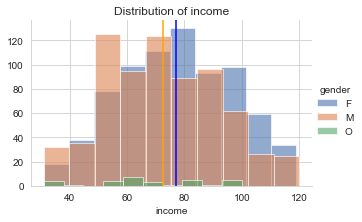

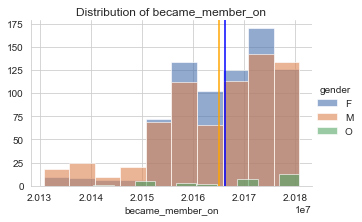

In [56]:
draw_hist_pics(cid_offer_like.query("discount_offer_ratio<=0.60 & discount_offer_ratio>=0.4"), cols1, hue='gender')

In [57]:
# 偏好informational的用户群体特征
informational_like, informational_like_cid_groups = find_cid_groups(cid_offer_like, feature_groups, \
                                                  metric='informational_offer_ratio', condition='==1')

informational_like_cid_groups

gender
F    118
M    233
O      4
Name: count, dtype: int64 
 age_range
(17, 35]      59
(35, 55]     115
(55, 75]     139
(75, 100]     42
Name: count, dtype: int64 
 income_range
(29, 45]      88
(45, 60]     105
(60, 75]      93
(75, 90]      32
(90, 120]     37
Name: count, dtype: int64 
 became_member_year
(2012, 2014]     16
(2014, 2016]     61
(2016, 2018]    278
Name: count, dtype: int64 



gender age_range income_range became_member_year  count  tr_amount_mean  \
0      M  (55, 75]     (45, 60]       (2016, 2018]     24        4.093181   
1      M  (17, 35]     (29, 45]       (2016, 2018]     20        2.987077   
2      M  (35, 55]     (45, 60]       (2016, 2018]     20        6.429642   
3      M  (35, 55]     (60, 75]       (2016, 2018]     20        7.474600   
4      M  (35, 55]     (29, 45]       (2016, 2018]     18        3.285485   
5      M  (55, 75]     (29, 45]       (2016, 2018]     17        3.060559   
6      M  (55, 75]     (60, 75]       (2016, 2018]     16        8.279302   
7      F  (55, 75]    (90, 120]       (2016, 2018]     13       23.421103   
8      F  (55, 75]     (60, 75]       (2016, 2018]     11       11.261418   
9      M  (17, 35]     (60, 75]       (2016, 2018]     10        6.075592   

   tr_count_mean  
0       3.583333  
1       4.750000  
2       4.500000  
3       4.050000  
4       4.555556  
5       3.588235  
6       4.187500  
7       2.846154  
8       4.181818  
9       5.900000

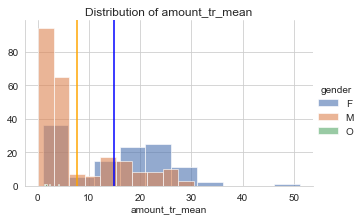

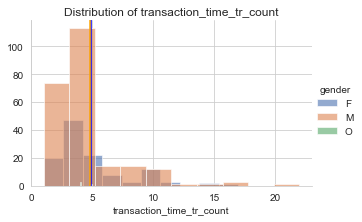

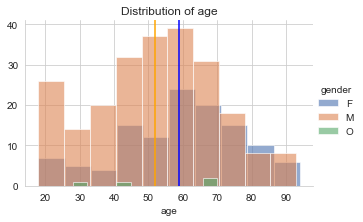

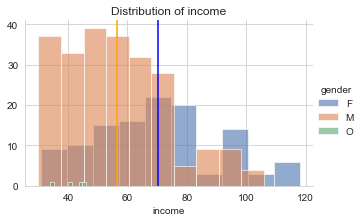

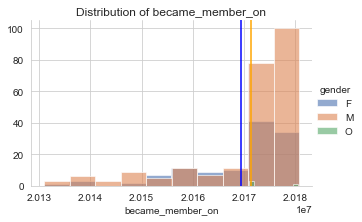

In [58]:
draw_hist_pics(cid_offer_like.query("informational_offer_ratio==1"), cols1, hue='gender')

结论：
- 信息类偏好的用户有自己独特的特征，以男性为主，绝大部分是17年以后注册的会员，收入水平低于75，年龄集中在35-75岁，也包括一些17-35岁的，同时单均金额和交易频次也较少
- 少数高收入女性也会响应信息类offer，消费金额高，但消费次数也偏少

In [59]:
# 偏好social渠道的用户群体特征
social_like, social_like_cid_groups = find_cid_groups(cid_offer_like, feature_groups, \
                                                  metric='social_offer_ratio', condition='==1')

social_like_cid_groups

gender
F    1777
M    1647
O      52
Name: count, dtype: int64 
 age_range
(17, 35]      330
(35, 55]     1155
(55, 75]     1528
(75, 100]     463
Name: count, dtype: int64 
 income_range
(29, 45]     401
(45, 60]     682
(60, 75]     810
(75, 90]     715
(90, 120]    868
Name: count, dtype: int64 
 became_member_year
(2012, 2014]      99
(2014, 2016]    1144
(2016, 2018]    2233
Name: count, dtype: int64 



gender age_range income_range became_member_year  count  tr_amount_mean  \
0      F  (55, 75]    (90, 120]       (2016, 2018]    195       26.142285   
1      F  (55, 75]     (75, 90]       (2016, 2018]    132       22.107223   
2      F  (55, 75]    (90, 120]       (2014, 2016]    121       26.306211   
3      M  (35, 55]     (60, 75]       (2016, 2018]    116       13.743418   
4      M  (55, 75]    (90, 120]       (2016, 2018]    102       26.553909   
5      M  (35, 55]     (45, 60]       (2016, 2018]     95       10.876985   
6      M  (55, 75]     (45, 60]       (2016, 2018]     92       10.769395   
7      F  (55, 75]     (60, 75]       (2016, 2018]     89       17.413313   
8      F  (35, 55]     (60, 75]       (2016, 2018]     88       17.208178   
9      M  (55, 75]     (60, 75]       (2016, 2018]     88       15.758236   

   tr_count_mean  
0       4.805128  
1       4.840909  
2       6.404959  
3       6.500000  
4       5.147059  
5       6.210526  
6       4.978261  
7       5.719101  
8       6.034091  
9       5.386364

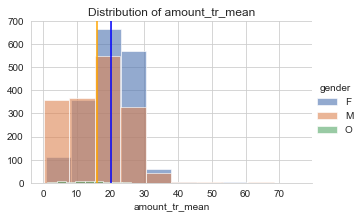

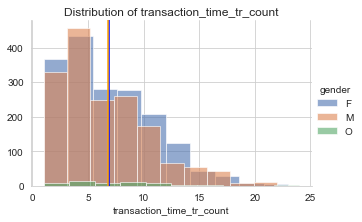

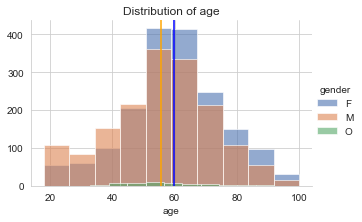

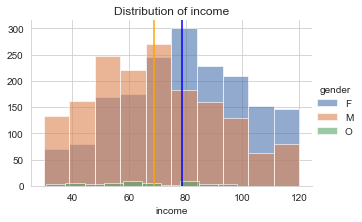

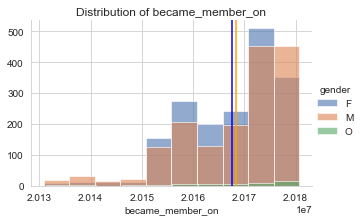

In [60]:
draw_hist_pics(cid_offer_like.query("social_offer_ratio==1"), cols1, hue='gender')

结论：
- 社交渠道活动用户，收入偏高，年龄55-75岁，大部分是15到17年的用户，下单频次相比只选择某类活动的用户下单频次更高

In [61]:
# 活动门槛难度（最低金额限制）较敏感的用户群体特征
cid_offer_like.query("difficulty_offer_ratio>0").difficulty_offer_ratio.describe()

count    6676.000000
mean        0.458790
std         0.195677
min         0.011210
25%         0.315358
50%         0.418148
75%         0.579458
max         0.999001
Name: difficulty_offer_ratio, dtype: float64

In [62]:
# 对活动门槛难度较敏感的用户群体特征
difficulty_sens, difficulty_sens_cid_groups = find_cid_groups(cid_offer_like, feature_groups, \
                                                  metric='difficulty_offer_ratio', condition='>=0.58')

difficulty_sens_cid_groups

gender
F    717
M    913
O     36
Name: count, dtype: int64 
 age_range
(17, 35]     231
(35, 55]     602
(55, 75]     635
(75, 100]    198
Name: count, dtype: int64 
 income_range
(29, 45]     337
(45, 60]     539
(60, 75]     425
(75, 90]     254
(90, 120]    111
Name: count, dtype: int64 
 became_member_year
(2012, 2014]      65
(2014, 2016]     516
(2016, 2018]    1085
Name: count, dtype: int64 



gender age_range income_range became_member_year  count  tr_amount_mean  \
0      M  (35, 55]     (45, 60]       (2016, 2018]     79       10.774138   
1      M  (35, 55]     (60, 75]       (2016, 2018]     65       12.429556   
2      M  (55, 75]     (45, 60]       (2016, 2018]     64       11.057737   
3      M  (35, 55]     (29, 45]       (2016, 2018]     57        6.893257   
4      F  (35, 55]     (45, 60]       (2016, 2018]     56       12.678739   
5      F  (55, 75]     (45, 60]       (2016, 2018]     54       13.036851   
6      M  (17, 35]     (29, 45]       (2016, 2018]     50        7.265877   
7      M  (55, 75]     (29, 45]       (2016, 2018]     45        6.853351   
8      M  (55, 75]     (60, 75]       (2016, 2018]     44       13.386050   
9      F  (55, 75]     (60, 75]       (2016, 2018]     41       14.797039   

   tr_count_mean  
0       7.341772  
1       6.707692  
2       6.312500  
3       7.824561  
4       7.303571  
5       6.203704  
6       9.120000  
7       7.577778  
8       5.886364  
9       6.195122

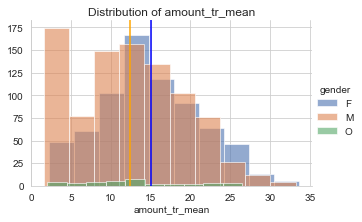

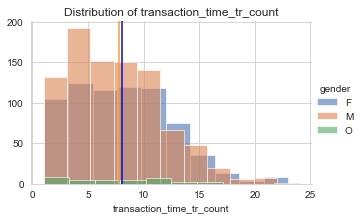

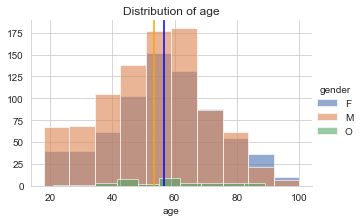

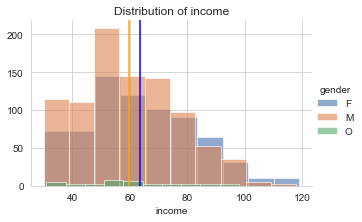

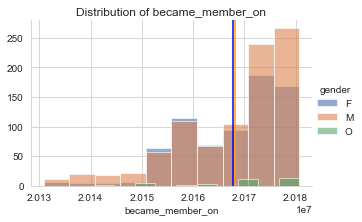

In [63]:
draw_hist_pics(cid_offer_like.query("difficulty_offer_ratio>=0.58"), cols1, hue='gender')

In [64]:
# 对活动门槛难度较不敏感的用户群体特征
difficulty_not_sens, difficulty_not_sens_cid_groups = find_cid_groups(cid_offer_like.query("difficulty_offer_ratio>0"),\
                                                                      feature_groups, \
                                                          metric='difficulty_offer_ratio', condition='<=0.31')

difficulty_not_sens_cid_groups

gender
F    879
M    675
O     15
Name: count, dtype: int64 
 age_range
(17, 35]      45
(35, 55]     519
(55, 75]     789
(75, 100]    216
Name: count, dtype: int64 
 income_range
(29, 45]      27
(45, 60]     116
(60, 75]     277
(75, 90]     396
(90, 120]    753
Name: count, dtype: int64 
 became_member_year
(2012, 2014]     52
(2014, 2016]    623
(2016, 2018]    894
Name: count, dtype: int64 



gender  age_range income_range became_member_year  count  tr_amount_mean  \
0      F   (55, 75]    (90, 120]       (2016, 2018]    148       27.833431   
1      F   (55, 75]    (90, 120]       (2014, 2016]    106       27.125849   
2      M   (55, 75]    (90, 120]       (2016, 2018]     86       28.001183   
3      F   (55, 75]     (75, 90]       (2016, 2018]     71       25.041464   
4      F   (35, 55]    (90, 120]       (2016, 2018]     64       27.377494   
5      M   (55, 75]    (90, 120]       (2014, 2016]     62       26.929913   
6      F   (35, 55]    (90, 120]       (2014, 2016]     62       27.349886   
7      F   (55, 75]     (75, 90]       (2014, 2016]     49       23.280742   
8      M   (35, 55]    (90, 120]       (2016, 2018]     48       26.822305   
9      F  (75, 100]    (90, 120]       (2016, 2018]     46       27.236148   

   tr_count_mean  
0       5.587838  
1       7.481132  
2       5.883721  
3       5.971831  
4       5.718750  
5       7.709677  
6       7.532258  
7       7.244898  
8       5.291667  
9       6.760870

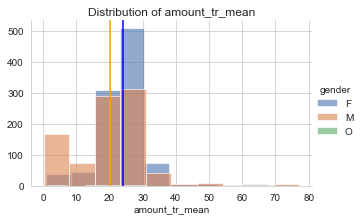

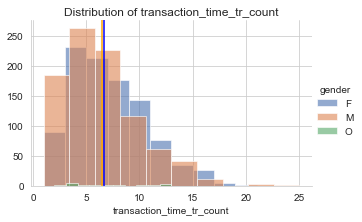

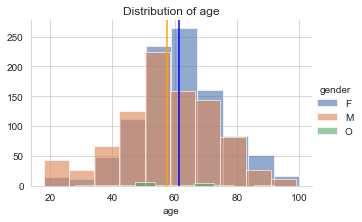

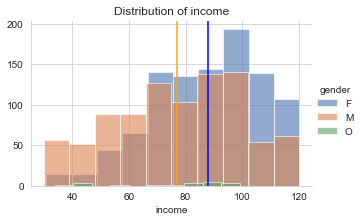

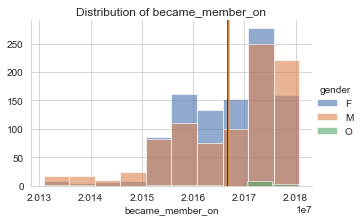

In [65]:
draw_hist_pics(cid_offer_like.query("difficulty_offer_ratio<=0.31"), cols1, hue='gender')

结论：
- 比较而言，男性比女性对difficulty更敏感，年龄较低的、收入较低的对difficulty更敏感
- 对difficulty不敏感的人，次均交易金额高出许多， 但交易次数比difficulty更敏感的人略少一些

## 总结

##### 反思：
- 整个过程包括：
1）理清问题 
2）思考可以回答问题的数据指标
3）根据数据构建表格和所需要的指标 
4）根据指标进行探索性分析或者模型构建 
5）得出结论（回答问题或应用结论）

*   其中，问题和指标定义环节很关键，决定了后续工作的效率和成果
*   由于业务的复杂性，在构建指标整理表格的时候有较大的挑战（判断offer完成应该记在哪一次交易上）
*   在后续回答问题时，需要反复探索数据（分类、对比、可视化），找到特定用户群的特征

##### 主要使用的方法：
- 在找关键活动要素的时候用了回归分析
- 最后回答问题时主要采用了指标对比法——将每类活动偏好的用户群体数据进行对比，找到特定的用户特征

##### 改进和扩展：
*   本分析没有详细分析渠道用户特征，当判断社交渠道的用户群体特征时，还应该同时对比其他渠道的用户特征，这样可以让社交渠道偏好的用户定位更精准
*   本分析只回答了什么用户对什么活动更感兴趣的问题，可能有助于提高营销效率、降低营销成本，但还不够深入，更深入的分析包括比如：考虑发送的成本，就每类活动发送的响应情况，计算ROI
*   该数据也可以通过建立回归模型，预测什么用户将会付更多的钱，来达到提高收益的目的